In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
from dlnpyutils import coords
from dlnpyutils import utils as dln
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
from astropy import coordinates
from astropy.coordinates import SkyCoord
import astropy.units as u

The Gaia ESA Archive will be prepared for the Focused Product Release (FPR) and will be offline on Tuesday 10 October 2023 between 09:00 and 12:00 CEST.


In [2]:
glob_clust  = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\mwgc.fits")
allStar = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\allStarLiter-dr17-synspec_rev1.fits.gz")

In [3]:
glob_clust

<Table length=150>
   ID         NAME              RA         ...   LGTH    MUV     RHO0 
 bytes8     bytes13          float64       ... float32 float32 float32
-------- ------------- ------------------- ... ------- ------- -------
NGC 104  47 Tuc        0.40144444439146254 ...    9.48   14.43    4.81
NGC 288        999999.  0.8798611111111111 ...    9.33   19.95     1.8
NGC 362        999999.  1.0539722222752042 ...    8.93   14.88     4.7
NGC 1261       999999.   3.204250000052982 ...     9.2   17.65    2.96
Pal 1          999999.   3.556388888888889 ...    8.02   20.93    2.22
AM 1     E 1             3.917416666679912 ...    9.74   23.86    0.03
Eridanus       999999.   4.412361111111111 ...    9.46   22.81    0.37
Pal 2          999999.   4.768305555582047 ...     9.5   19.39    3.76
NGC 1851       999999.   5.235083333386315 ...    8.85   14.15    5.32
NGC 1904 M 79            5.402944444550409 ...     9.1   16.23     4.0
     ...           ...                 ... ...     ...     ...     ...
NGC 6864 M 75           20.101333333386318 ...    9.17   15.55    4.47
NGC 6934       999999.  20.569888888994853 ...    8.97   17.26    3.43
NGC 6981 M 72           20.891083333227368 ...     9.2    18.9    2.35
NGC 7006       999999.   21.02486111111111 ...    9.34    18.5    2.46
NGC 7078 M 15           21.499527777565852 ...    9.35   14.21    5.38
NGC 7089 M 2             21.55813888867696 ...    9.32   15.92     3.9
NGC 7099 M 30           21.672777777777778 ...    8.95   15.28    5.04
Pal 12         999999.  21.777444444232515 ...    9.11   20.59    1.99
Pal 13         999999.   23.11233333375719 ...    8.52   23.36     0.4
NGC 7492       999999.  23.140750000211927 ...    9.48   21.33    0.97

In [4]:
allStar

<Table length=733901>
    APOGEE_ID      TELESCOPE    FIELD    ...  CE_FE_ERR  CE_FE_FLAG
     bytes30         bytes6    bytes20   ...   float32     int32   
------------------ --------- ----------- ... ----------- ----------
             VESTA     apo1m calibration ...          --         64
2M00000002+7417074    apo25m      120+12 ...          --         64
2M00000019-1924498    apo25m      060-75 ...          --         64
2M00000032+5737103    apo25m      116-04 ...          --         64
2M00000032+5737103    apo25m       N7789 ...          --         64
2M00000035-7323394    lco25m       SMC12 ...  0.14683686          0
2M00000068+5710233    apo25m       N7789 ...  0.08657244          0
2M00000103+1525513    apo25m  107-46_MGA ...          --         64
2M00000133+5721163    apo25m NGC7789_btx ...   0.1323888          0
2M00000211+6327470    apo25m      117+01 ...  0.07000649          0
               ...       ...         ... ...         ...        ...
2M23595676+7918072    apo25m      120+18 ... 0.043006398          0
2M23595756+8535275    apo25m        N188 ...          --         64
2M23595837+5700444    apo25m       N7789 ...  0.14140786          0
2M23595846+1503028    apo25m  107-46_MGA ...          --         64
2M23595867-7339039    lco25m       SMC12 ...  0.13771407          0
2M23595886-2009435    apo25m      060-75 ...          --         64
2M23595886+5726058    apo25m      116-04 ...  0.07244323          0
2M23595921+5609479    apo25m NGC7789_MGA ...  0.09757203          0
2M23595949-7342592    lco25m       SMC12 ...   0.1401879          0
2M23595980+1528407    apo25m      105-45 ...          --         64

In [5]:
glob_clust[50]

<Row index=50>
   ID         NAME             RA                 DEC            L       B      RSUN    RGC      X       Y       Z      EBV     VHB     DMOD     VT     MVT      UB       BV       VR       VI      SRR      HBR      HBT     FEH        SPT         RV     RVERR     VLSR     VGSR      C          CREM        E        RC       RH       RT      LGTC     LGTH     MUV     RHO0  
 bytes8     bytes13         float64             float64       float64 float64 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32  float32  float32  float32  float32  float32  float32 float32    bytes13    float32  float32  float32  float32  float32     bytes13    float32  float32  float32  float32  float32  float32  float32 float32 
-------- ------------- ------------------ ------------------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- -------- -------- -------- -------- -------- -------- ------- ------- ------------- -------- -------- -------- -------- -------- ------------- -------- -------- -------- -------- -------- -------- ------- --------
1636-283 ESO452-SC11   16.657083333333333 -28.397777777777776  351.91    12.1     7.8     2.0     7.5    -1.1     1.6    0.49   16.55   15.97    12.0   -3.97 999999.0 999999.0 999999.0 999999.0 999999.0 999999.0     6.0    -1.5       999999. 999999.0 999999.0 999999.0 999977.2 999999.0       999999. 999999.0 999999.0 999999.0 999999.0 999999.0 999999.0   20.75 999999.0

In [6]:
#manually changing weird values
glob_clust[14]["RV"] = 4.8 #E3 simbad
glob_clust[28]["RV"] = 151.19 #AM4 simbad
glob_clust[32]["RV"] = 38.7 #IC4499 simbad
glob_clust[39]["RT"] = 3 #BH176 https://www.aanda.org/articles/aa/pdf/2011/04/aa15514-10.pdf
glob_clust[39]["RV"] = 11.2 #BH176 https://ui.adsabs.harvard.edu/abs/2006AJ....131..922F/abstract#:~:text=We%20provide%20the%20first%20reliable%20radial%20velocity%20for,for%20Sa%201%20%28A%29%20and%20Be%2029%2C%20respectively.
glob_clust[39]["FEH"] = -0.1 #BH176 https://www.aanda.org/articles/aa/pdf/2011/04/aa15514-10.pdf
glob_clust[41]["RT"] = 1.2 #Lynga7 simbad
#glob_clust[50] = 1636-283 has no info
glob_clust[72]["RT"] = 2.5 #IC1257 https://stellarscenes.net/object_e/ic1257.htm
glob_clust[75]["RT"] = 1.85 #Terzan4 http://gclusters.altervista.org/cluster_4.php?ggc=Terzan+4
glob_clust[94]["RV"] = 56.67 #UKS1 simbad
glob_clust[97]["RV"] = -148.05 #Djorg2 or ESO456-38 simbad
#glob_clust[99] = Terzan10 has no info
#glob_clust[107] = 2MS-GC01 has no info
#glob_clust[108] = ESO-SC06 has no info
#glob_clust[110] = 2MS-GC02 has no info


In [7]:
cluster_stars = [0]*150
low_star_counts = []
high_star_counts = []
mid_star_counts = []
numberOfMatches = np.zeros(150,int)


for i in range(150):
    distances = coords.sphdist(glob_clust["RA"][i]*15, glob_clust["DEC"][i], allStar["RA"], allStar["DEC"])
    indi1,=np.where(distances<(glob_clust["RT"][i]/60))
    nmatch = len(indi1)
    if(nmatch==0):
        print("No radius matches found for " + str(glob_clust[i]["ID"]))
        cluster_stars[i] = None
        continue
    clusteri=allStar[indi1]
    
    indi2, = np.where(((glob_clust["RV"][i])-30)<clusteri["VHELIO_AVG"])  
    clusteri = clusteri[indi2]
    indi3, = np.where(((glob_clust["RV"][i])+30)>clusteri["VHELIO_AVG"])
    clusteri = clusteri[indi3]
    
    
    
    indi3, = np.where(((glob_clust["FEH"][i])-1)<clusteri["FE_H"])
    clusteri = clusteri[indi3]
    indi3, = np.where(((glob_clust["FEH"][i])+1)>clusteri["FE_H"])
    clusteri = clusteri[indi3]
        
    
    numberOfMatches[i] = len(clusteri)
    
    if(len(clusteri)<8):
        low_star_counts.append(clusteri)
    #elif(len(clusteri)>20):
        #high_star_counts.append(clusteri)
    else:
        mid_star_counts.append(clusteri)
        
    
    cluster_stars[i] = clusteri
    

In [8]:
medvel = np.zeros(150)
stdvel = np.zeros(150)

medmet = np.zeros(150)
stdmet = np.zeros(150)

for i in range(150):
    if(cluster_stars[i] is None):
        continue
        
    if(numberOfMatches[i] == 0):
        continue
    
    #print(i)
    medvel[i] = np.nanmedian(cluster_stars[i]["VHELIO_AVG"].data)
    stdvel[i] = dln.mad(cluster_stars[i]["VHELIO_AVG"].data)
    
    medmet[i] = np.nanmedian(cluster_stars[i]["FE_H"].data)
    stdmet[i] = dln.mad(cluster_stars[i]["FE_H"].data)

C:\Users\Sarah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


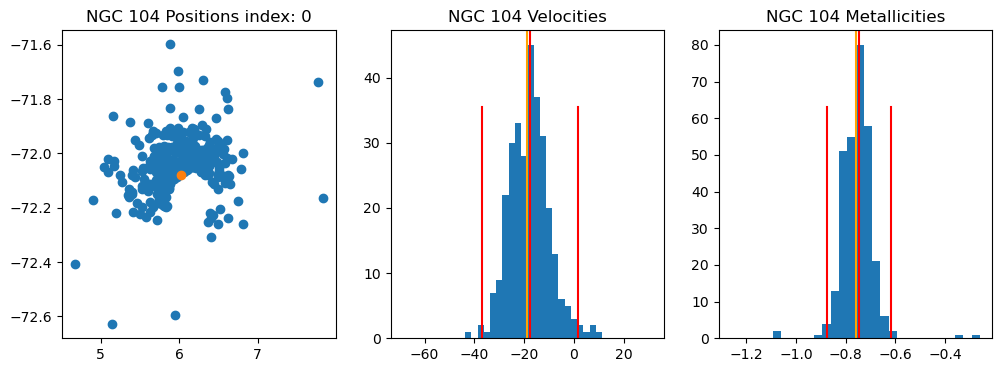

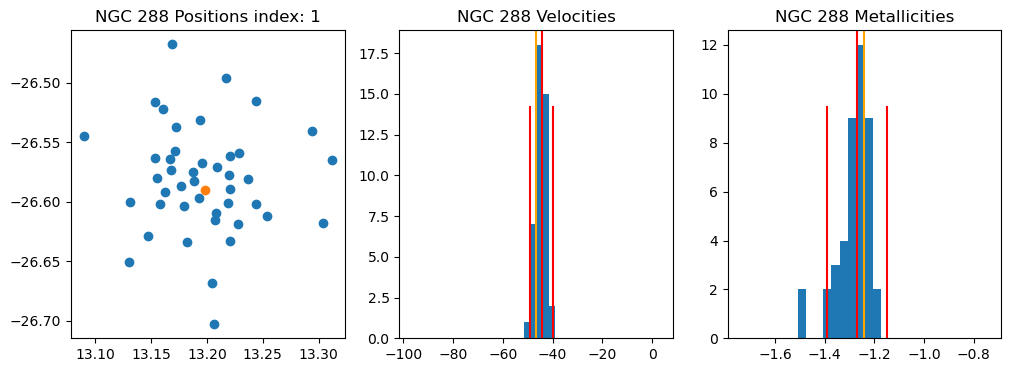

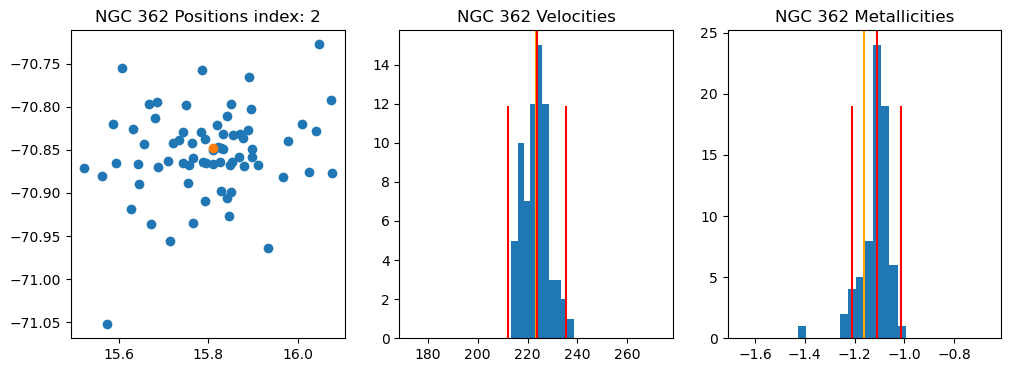

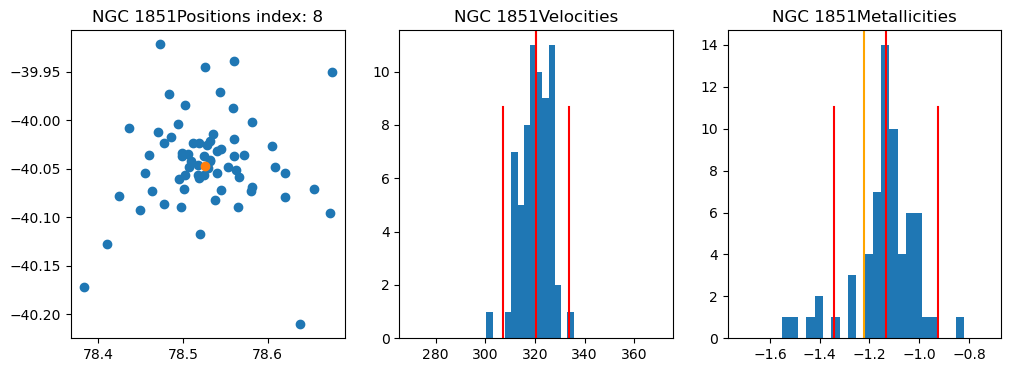

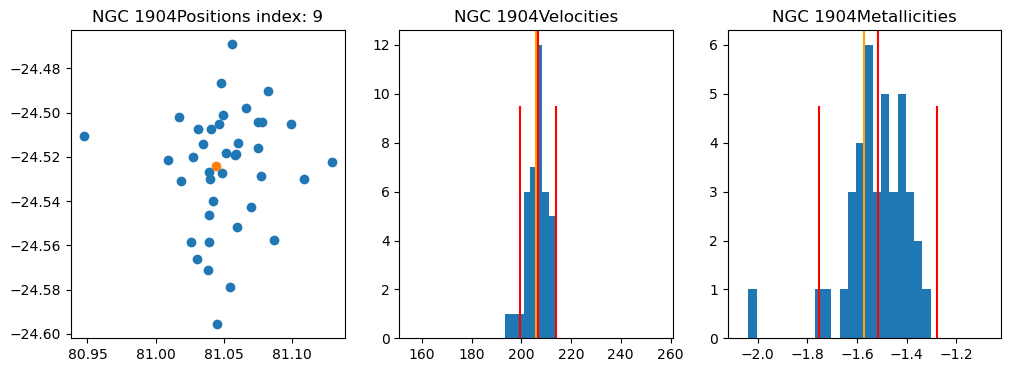

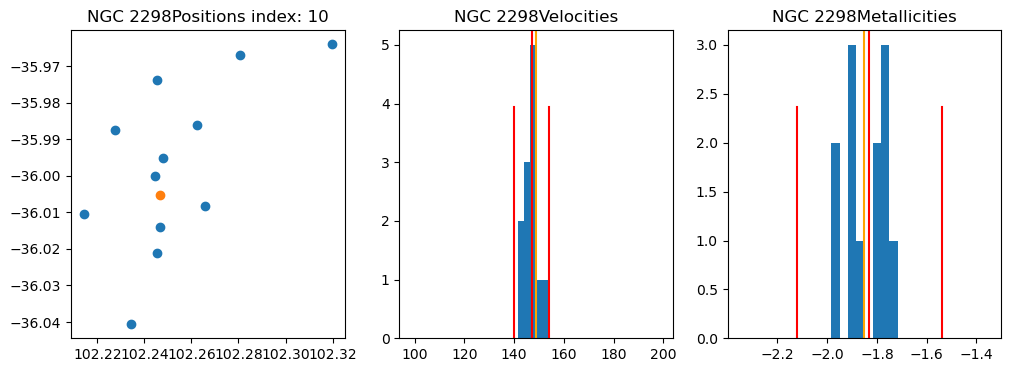

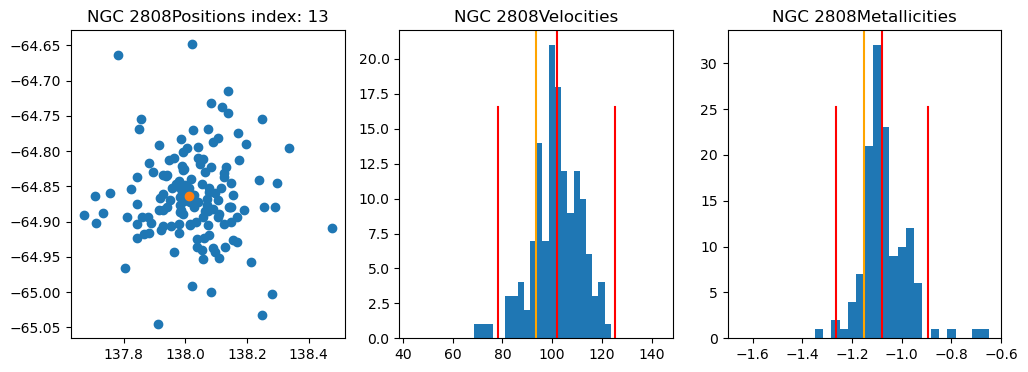

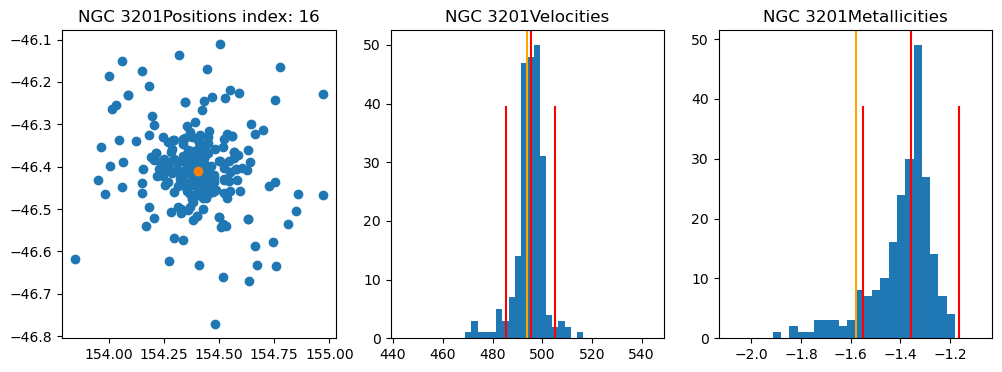

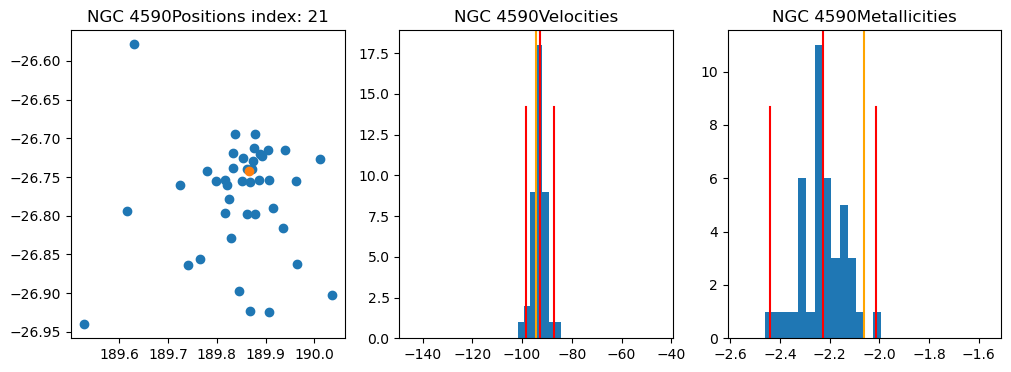

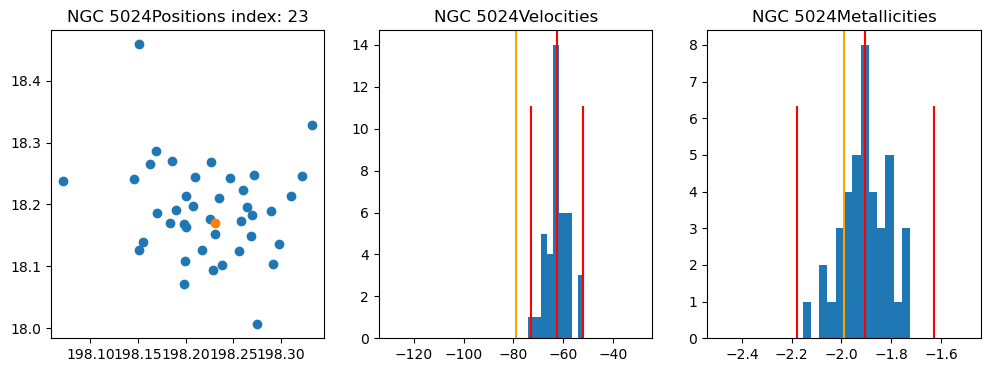

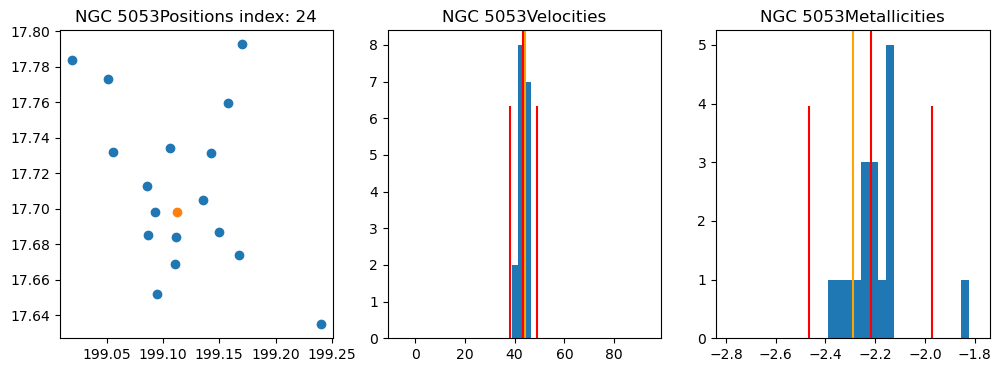

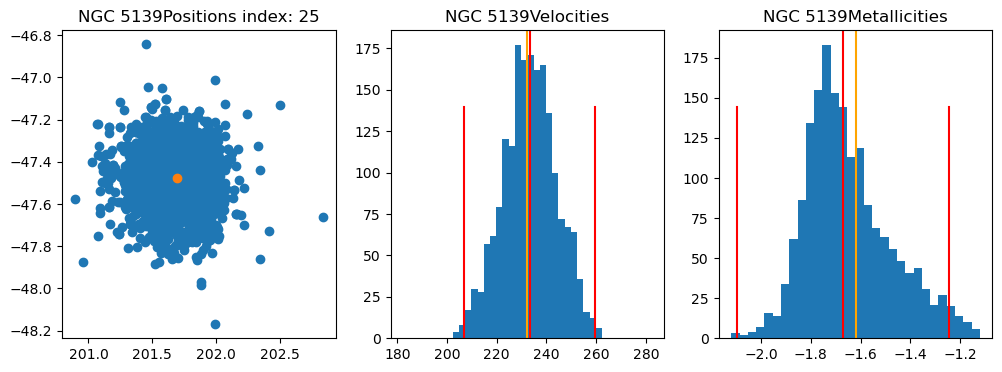

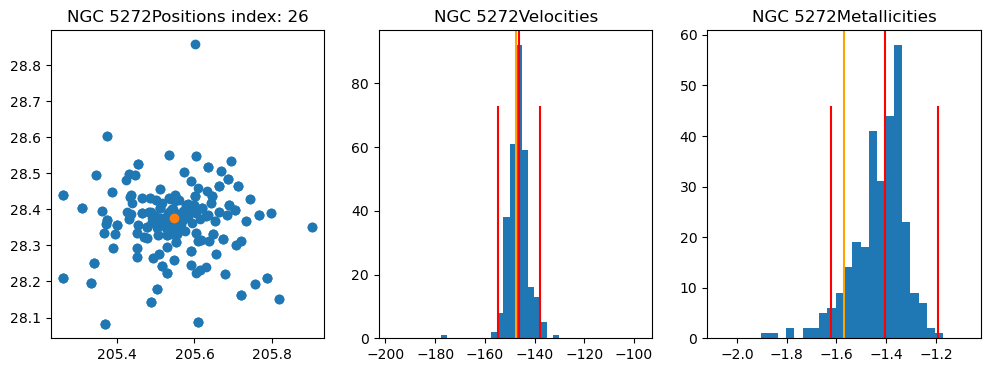

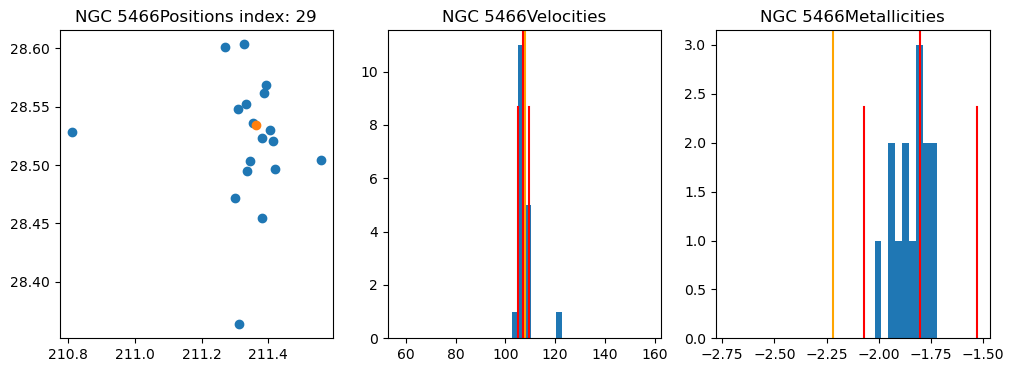

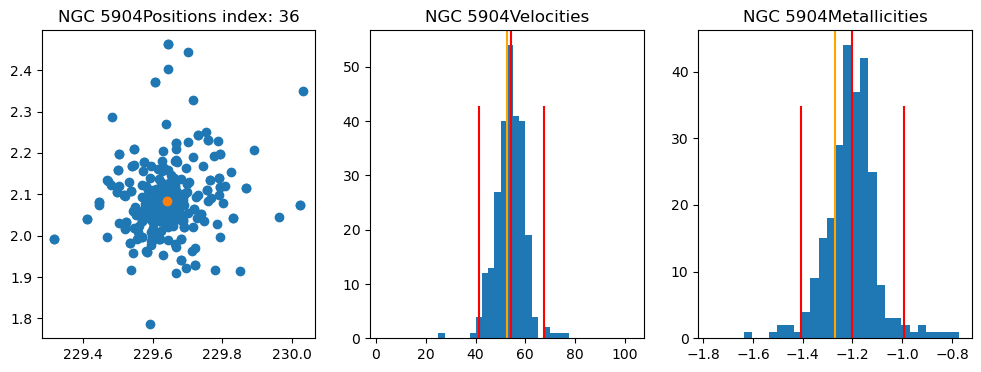

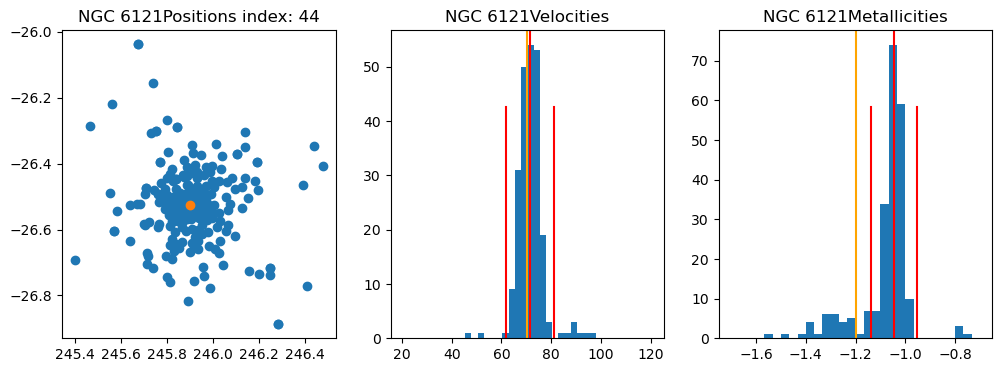

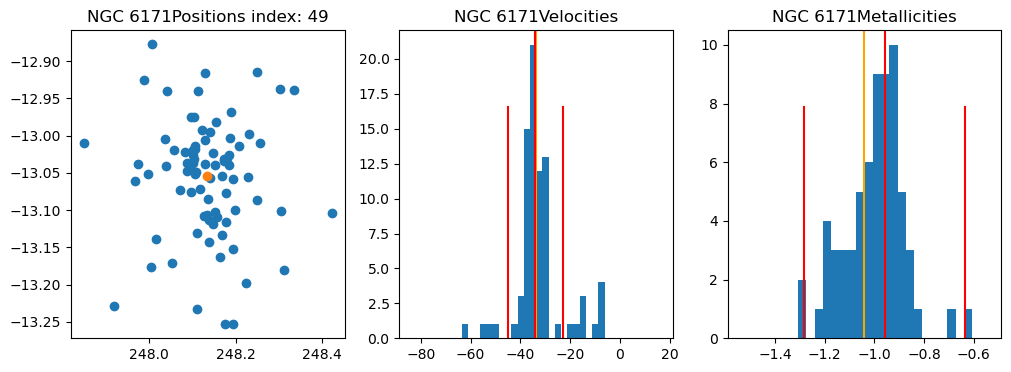

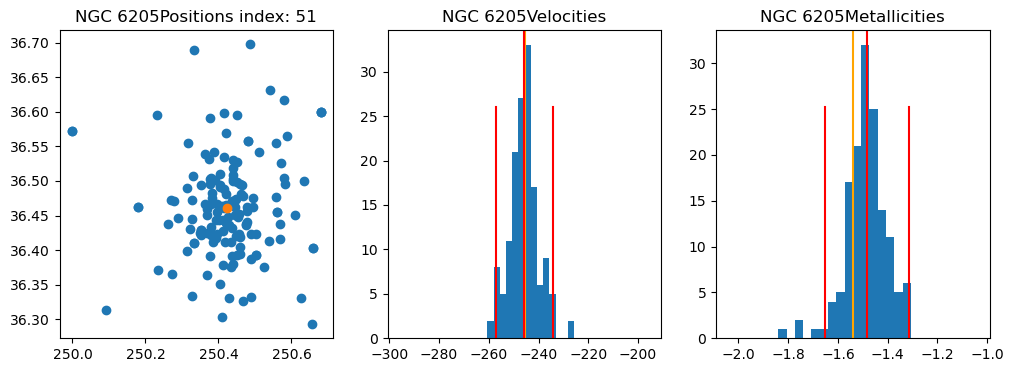

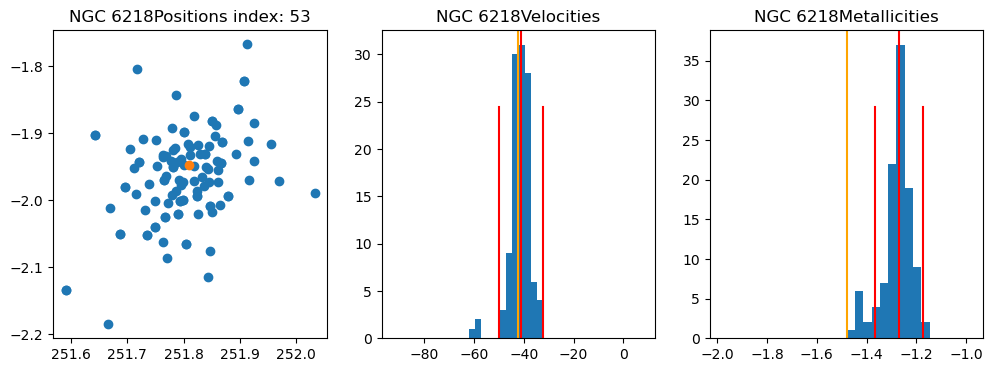

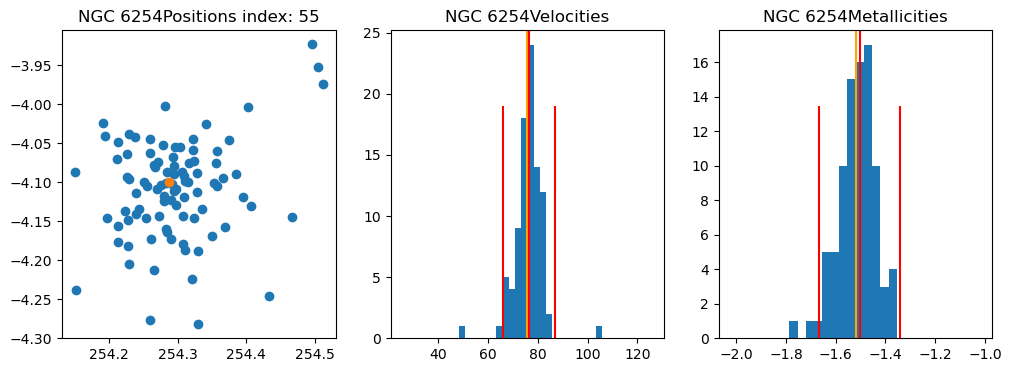

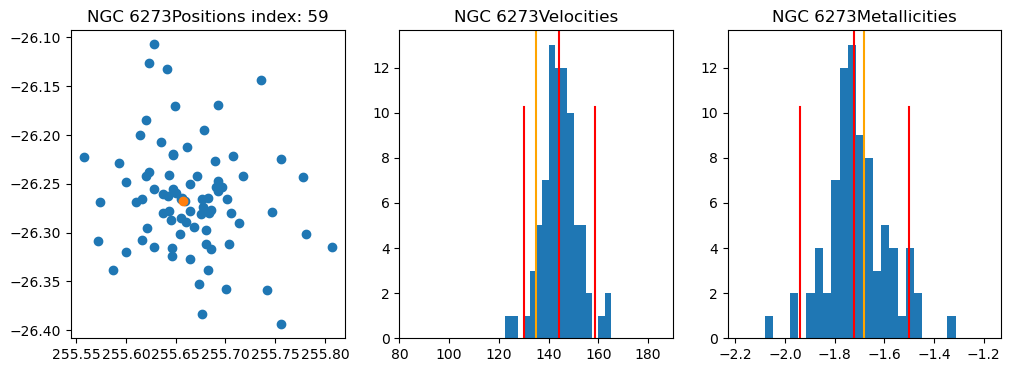

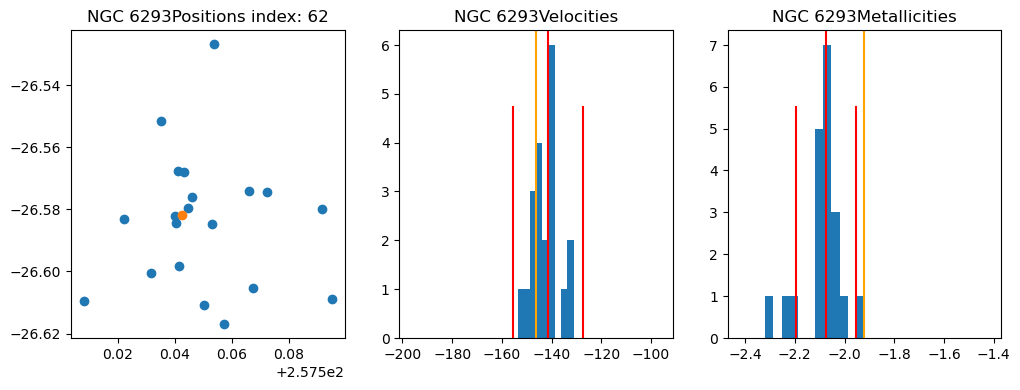

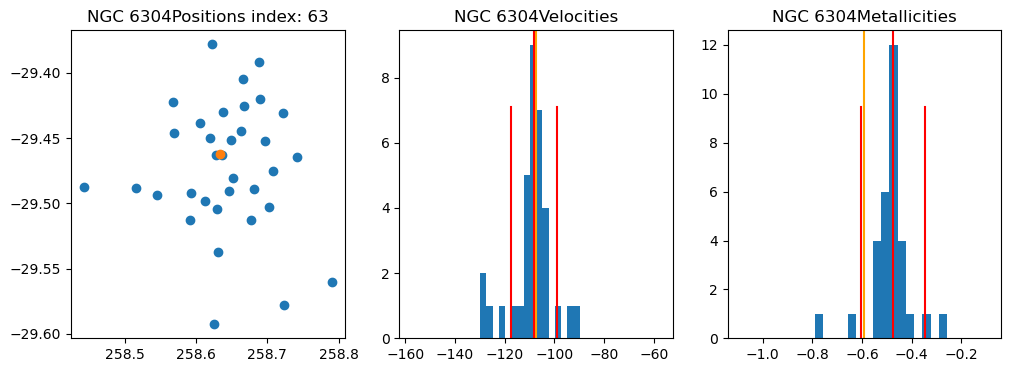

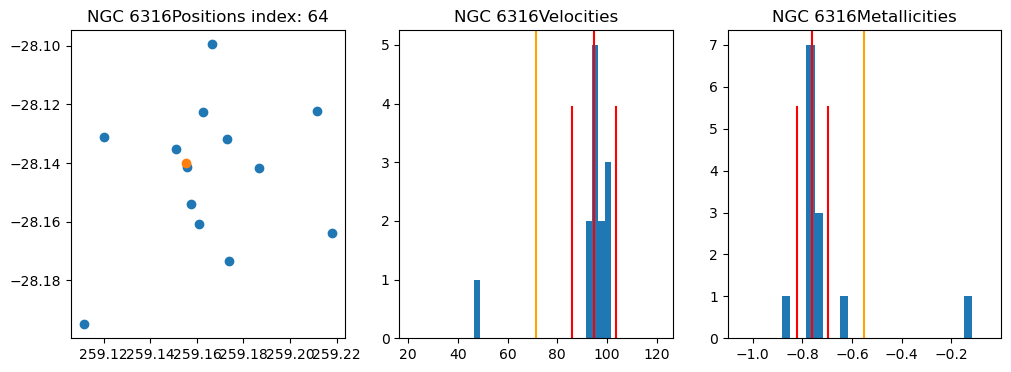

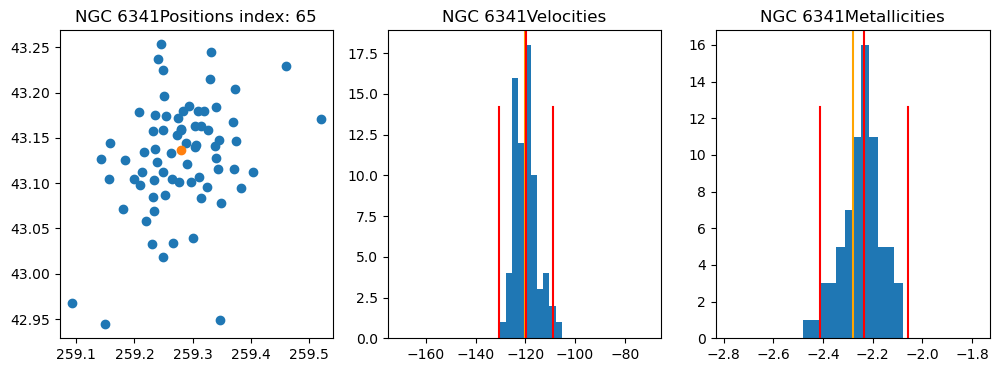

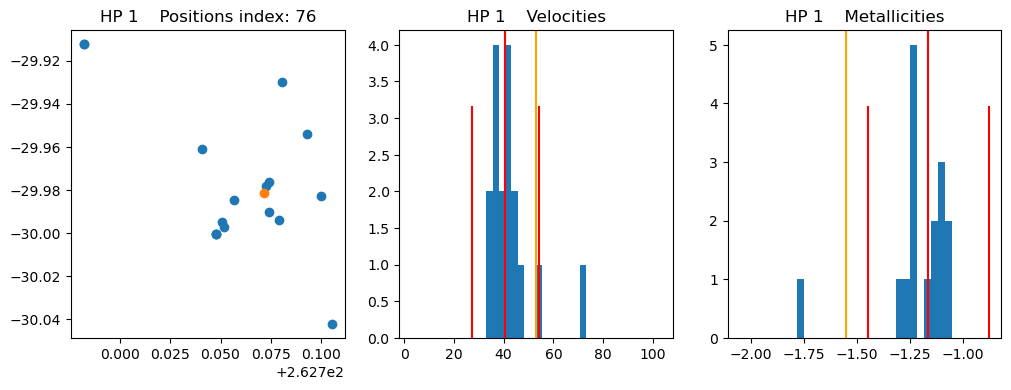

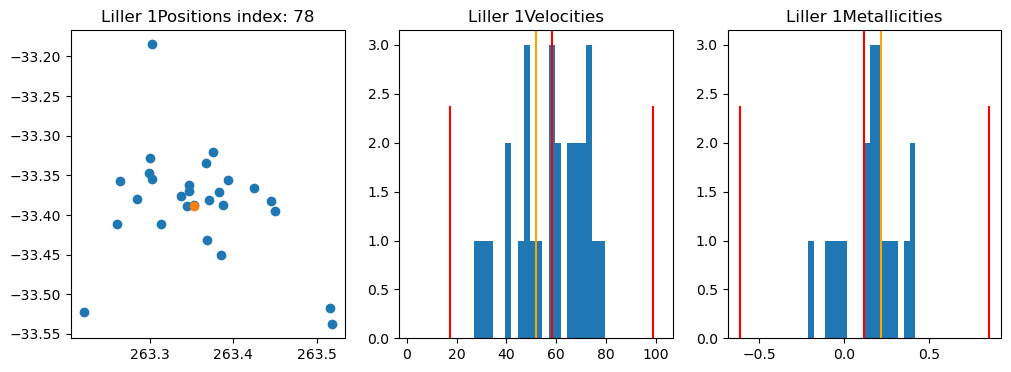

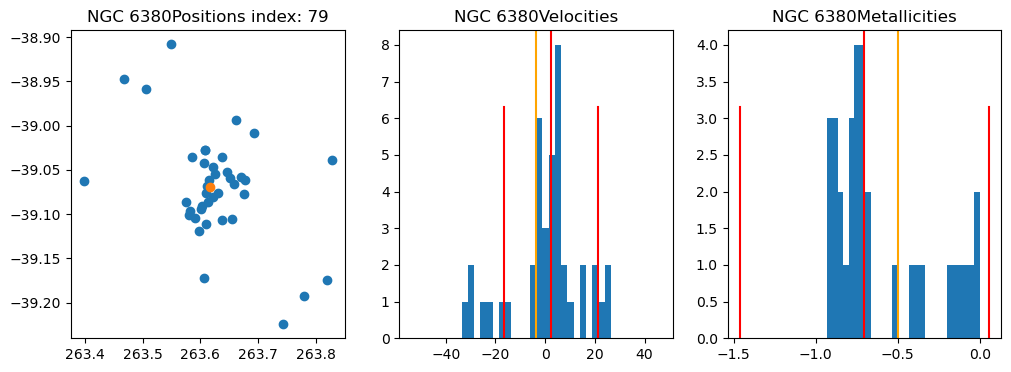

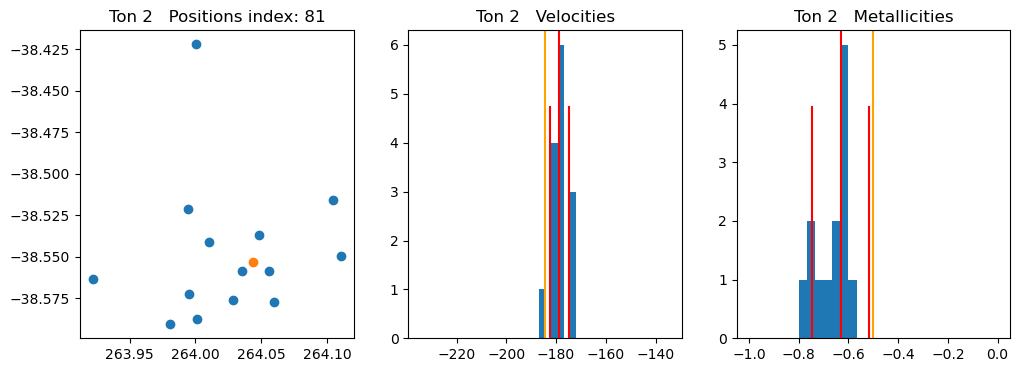

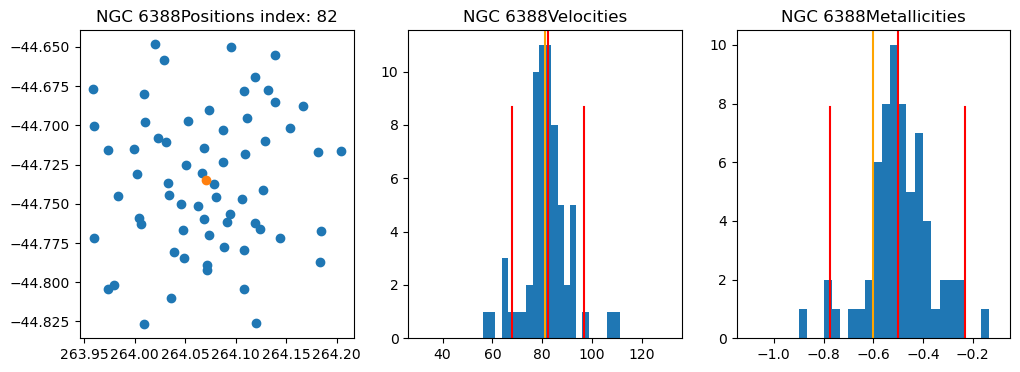

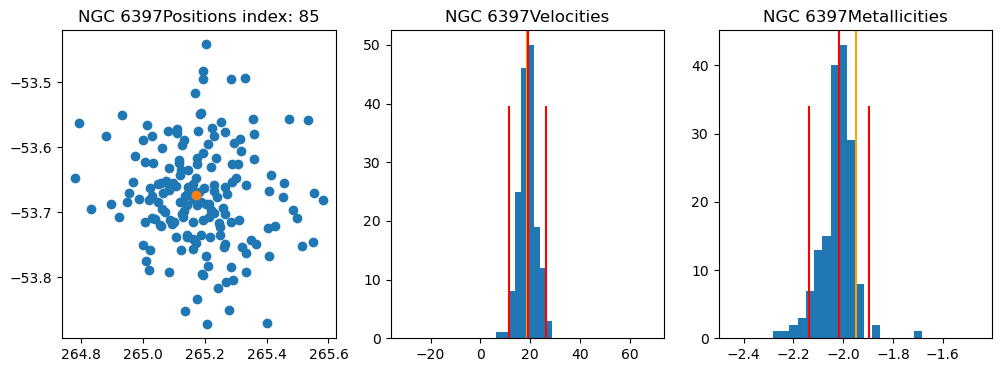

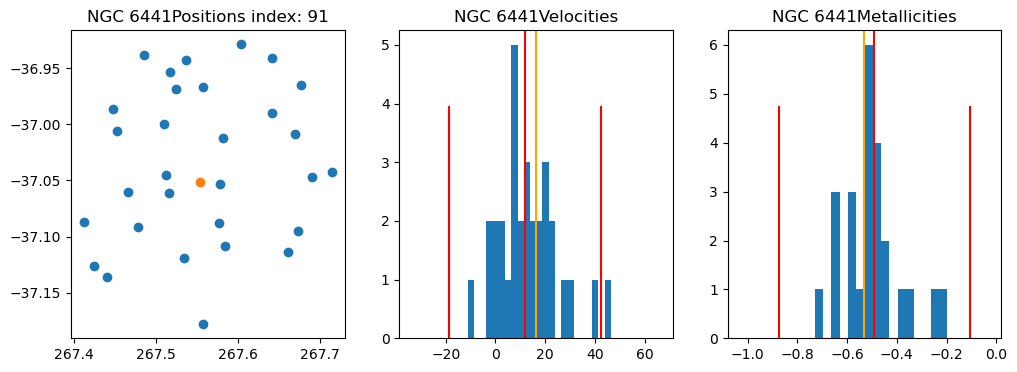

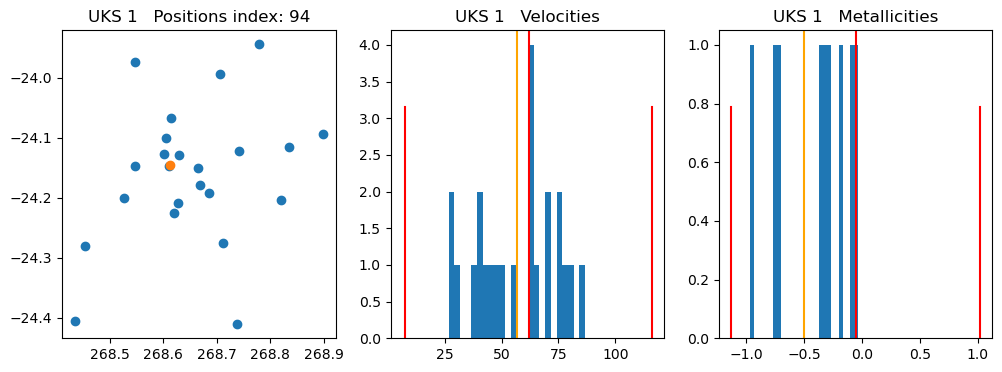

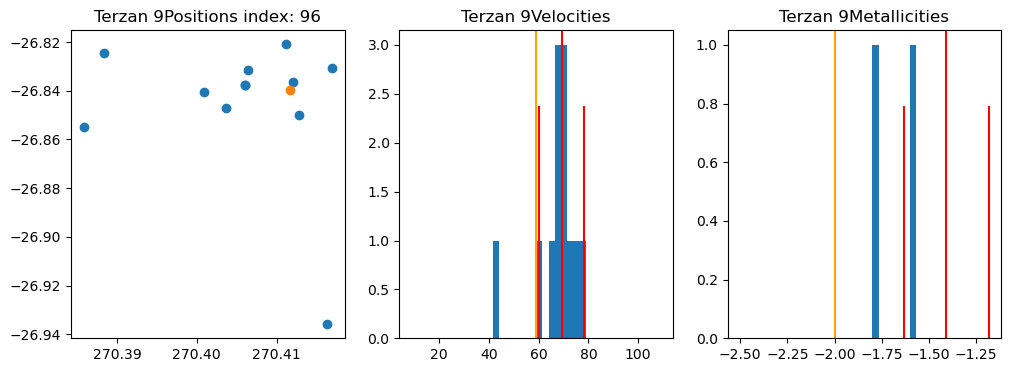

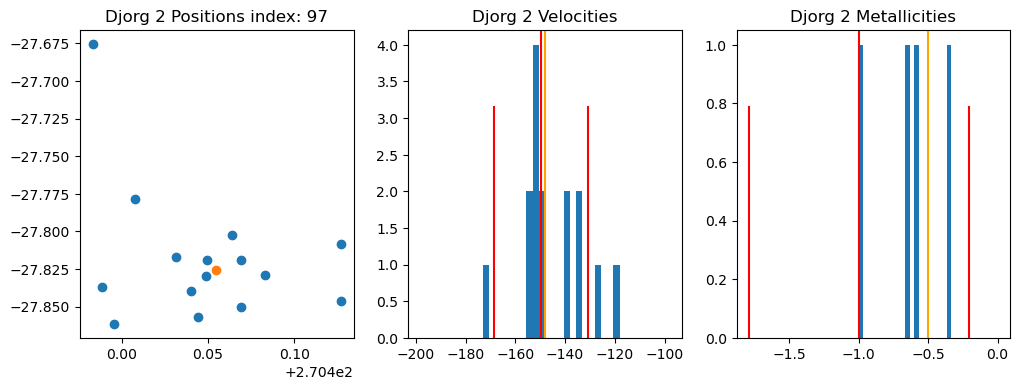

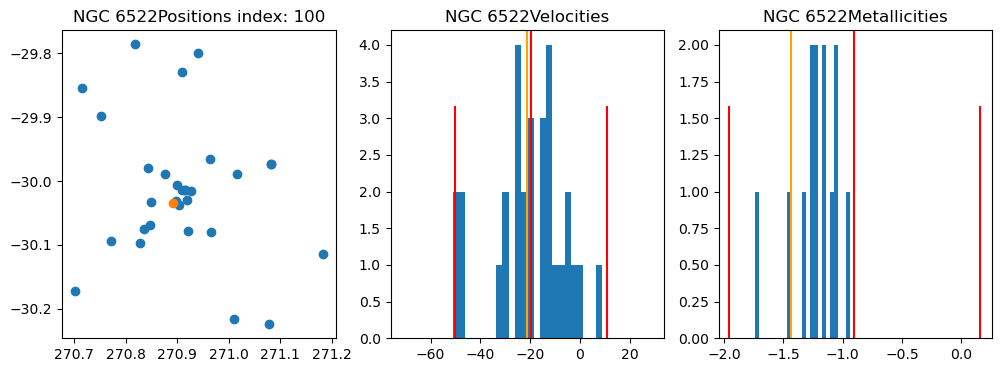

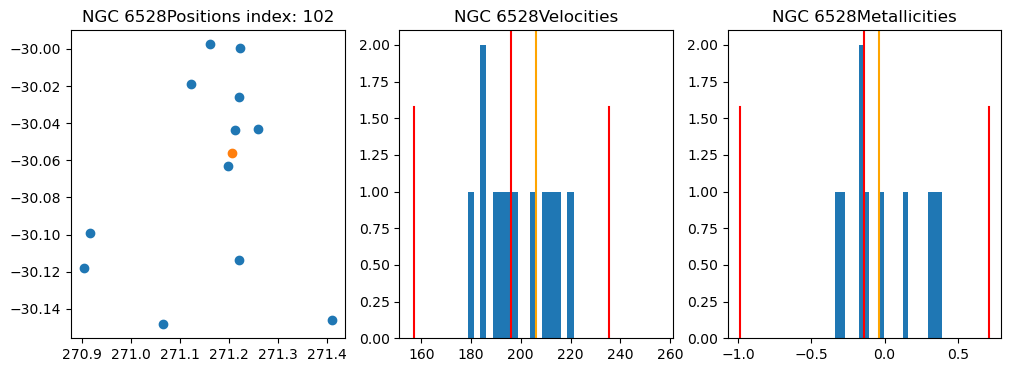

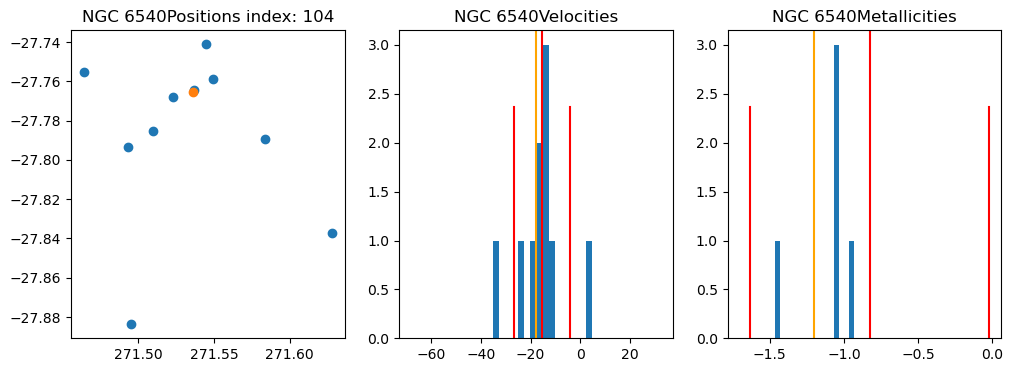

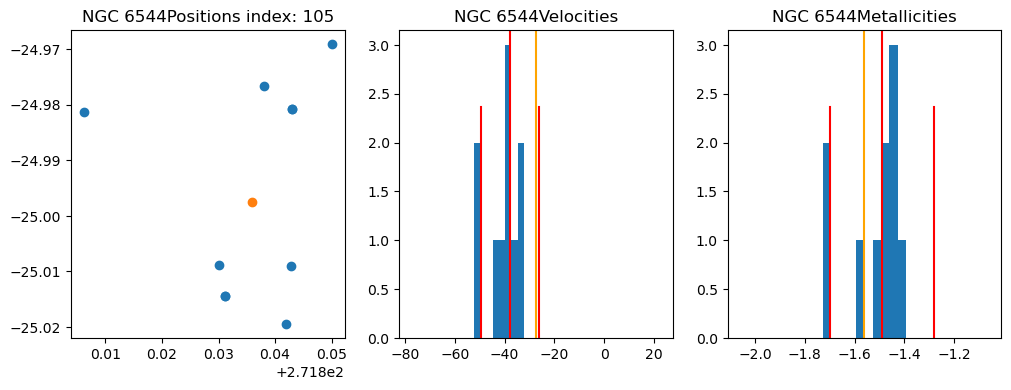

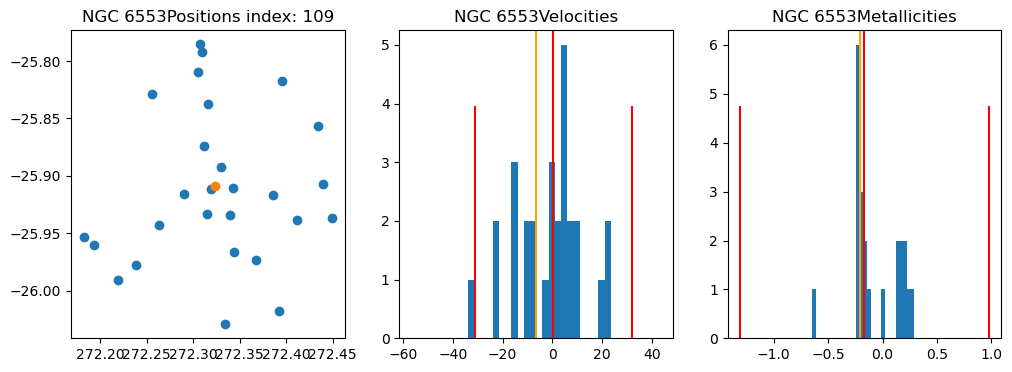

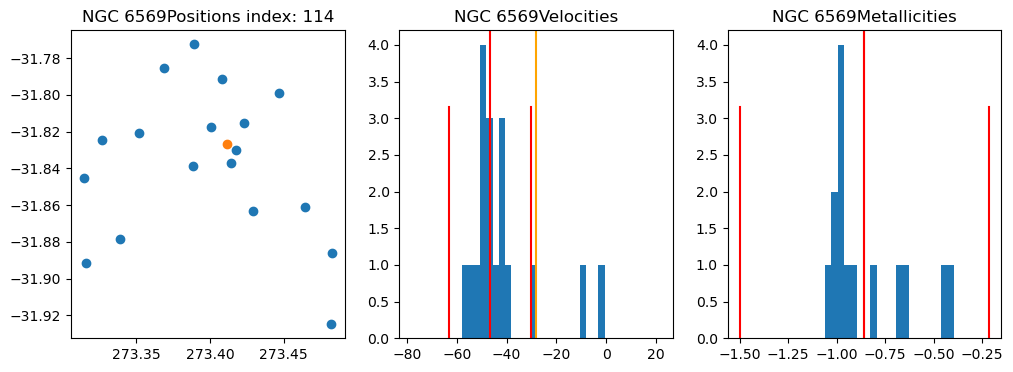

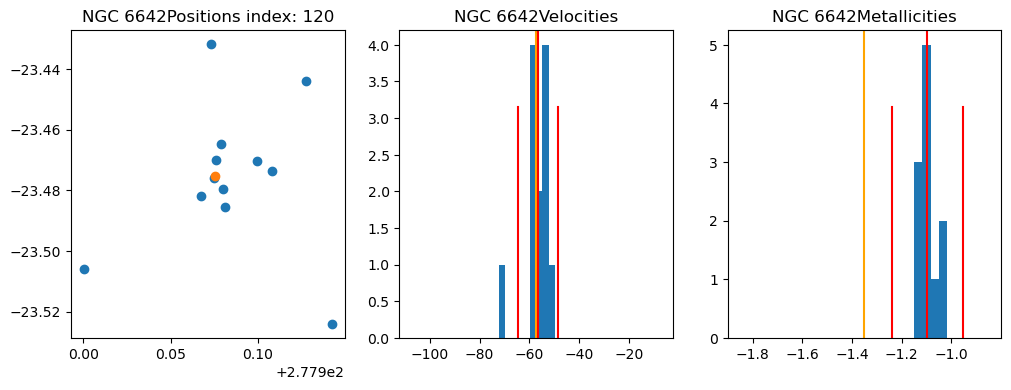

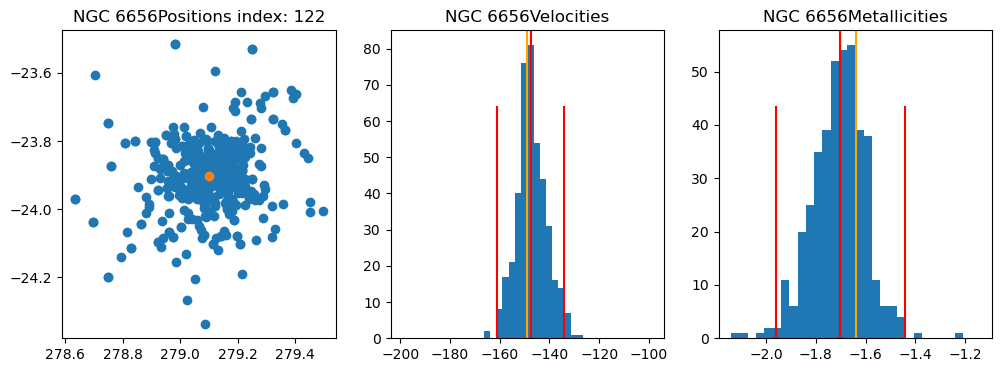

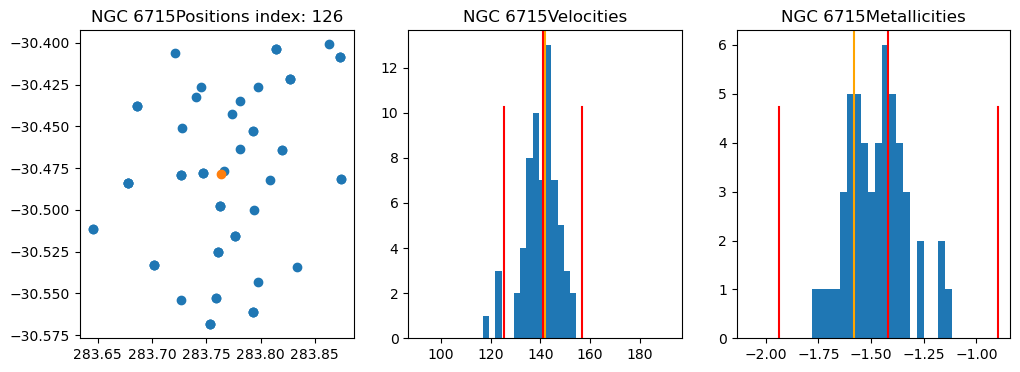

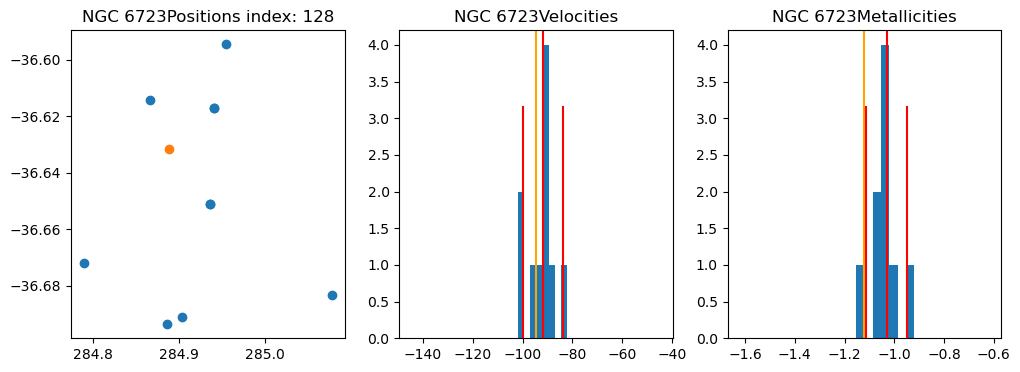

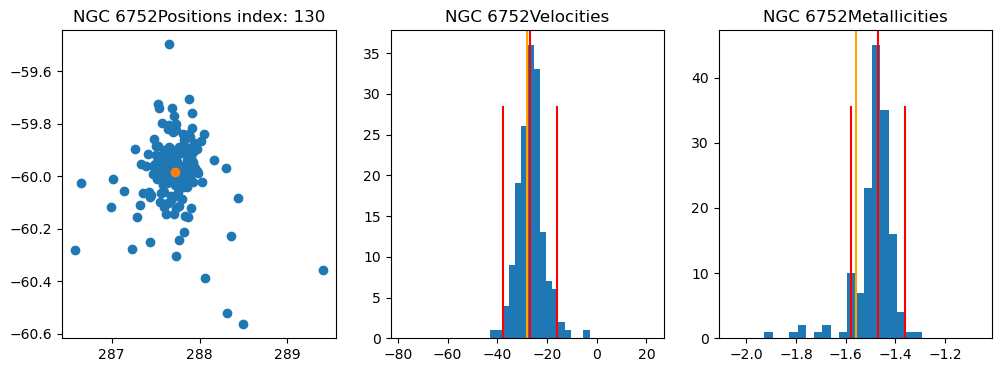

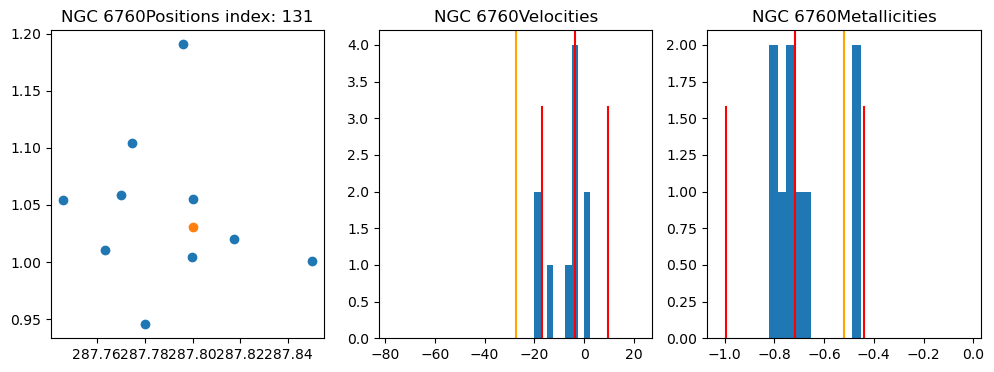

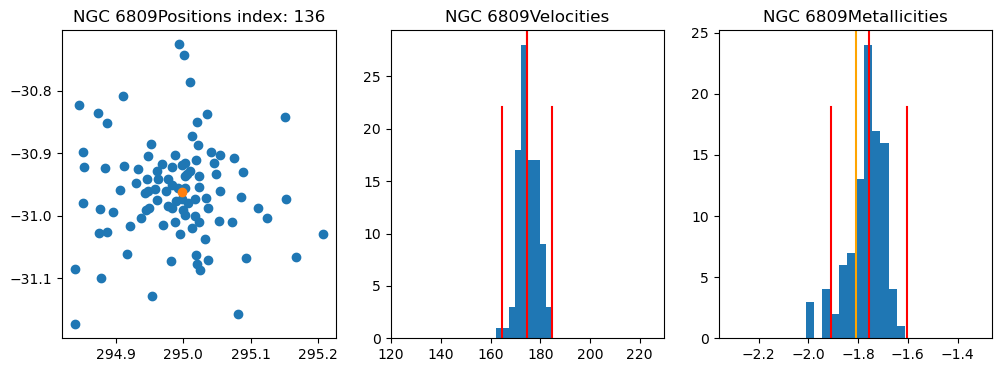

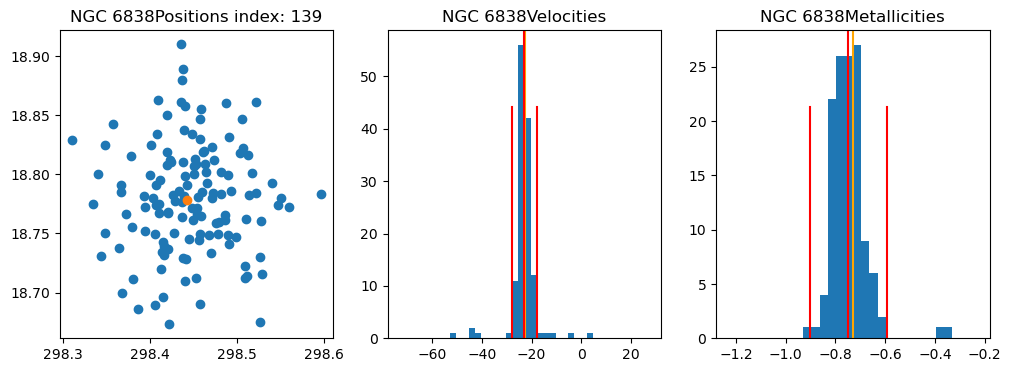

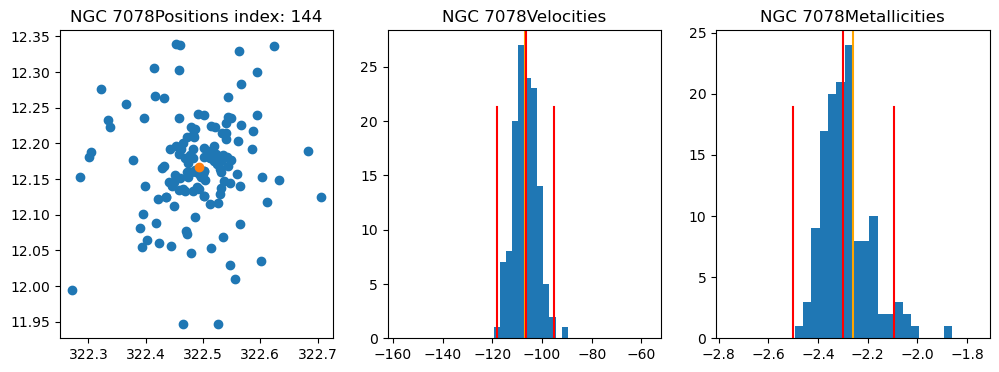

In [9]:
for i in range(len(cluster_stars)):
    graphmin = glob_clust[i]["RV"] -50
    graphmax = graphmin + 100
    
    metalmin = glob_clust[i]["FEH"] - .5
    metalmax = metalmin + 1
    
    if(numberOfMatches[i]<10):
        continue
    
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.scatter(cluster_stars[i]["RA"], cluster_stars[i]["DEC"])
    plt.scatter(glob_clust[i]["RA"]*15, glob_clust[i]["DEC"])
    plt.title(glob_clust[i]["ID"] + "Positions" + " index: " + str(i))
    
    plt.subplot(132)
    plt.hist(cluster_stars[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=40)
    plt.axvline(glob_clust[i]["RV"],0,1,color="orange")
    plt.axvline(medvel[i],0,1,color="red")
    plt.axvline(medvel[i] + stdvel[i]*2.5,0,.75,color="red")
    plt.axvline(medvel[i] - stdvel[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Velocities")
    
    plt.subplot(133)
    plt.hist(cluster_stars[i]["FE_H"],range=[metalmin,metalmax],bins=30)
    plt.axvline(glob_clust[i]["FEH"],0,1,color="orange")
    plt.axvline(medmet[i],0,1,color="red")
    plt.axvline(medmet[i] + stdmet[i]*2.5,0,.75,color="red")
    plt.axvline(medmet[i] - stdmet[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Metallicities")
    plt.show()

In [10]:
stdclusters = [0]*150

for i in range(len(cluster_stars)):
    #curclust = []
    #for j in range(len(cluster_stars[i])):
        #if((cluster_stars[i][j]["VHELIO_AVG"] < (medvel[i]+stdvel[i]*2.5)) and (cluster_stars[i][j]["VHELIO_AVG"] > (medvel[i]-stdvel[i]*2.5))):
           #curclust.append(cluster_stars[i][j])
           
    #stdclusters[i] = curclust
    
    
    curclust = cluster_stars[i]
    
    ind1, = np.where(curclust["VHELIO_AVG"] < (medvel[i]+stdvel[i]*2.5))
    curclust = curclust[ind1]
    ind2, = np.where(curclust["VHELIO_AVG"] > (medvel[i]-stdvel[i]*2.5))
    curclust = curclust[ind2]
    
    
    
    ind3, = np.where(curclust["FE_H"] < (medmet[i]+stdmet[i]*2.5))
    curclust = curclust[ind3]
    ind4, = np.where(curclust["FE_H"] > (medmet[i]-stdmet[i]*2.5))
    curclust = curclust[ind4]
    
    stdclusters[i] = curclust

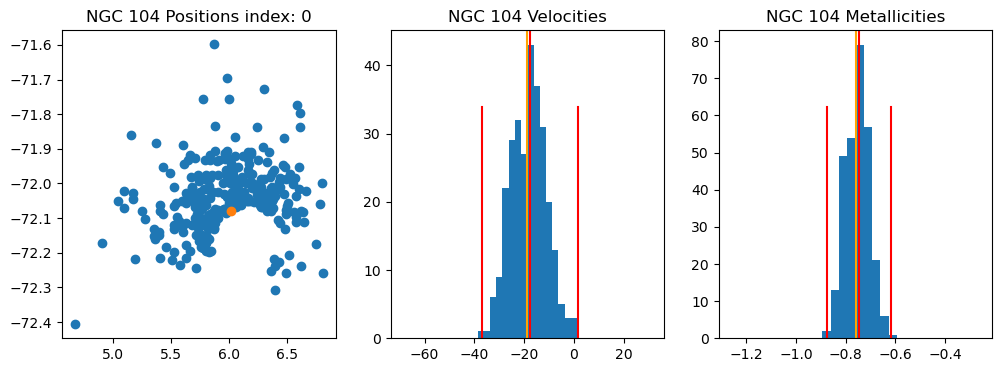

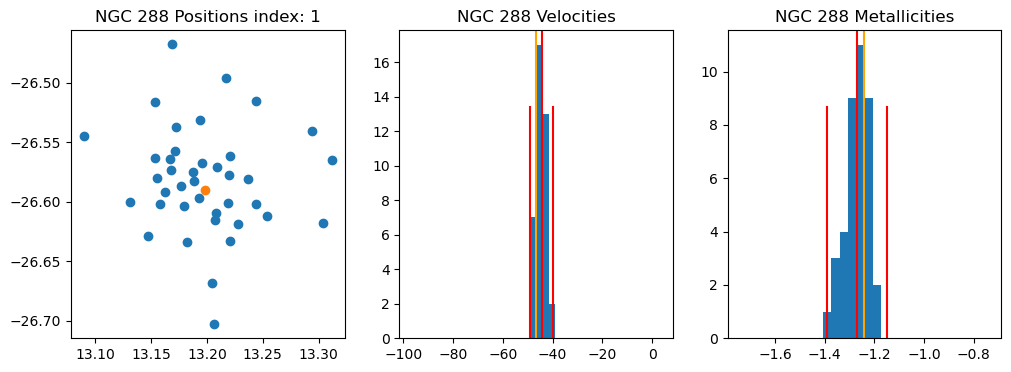

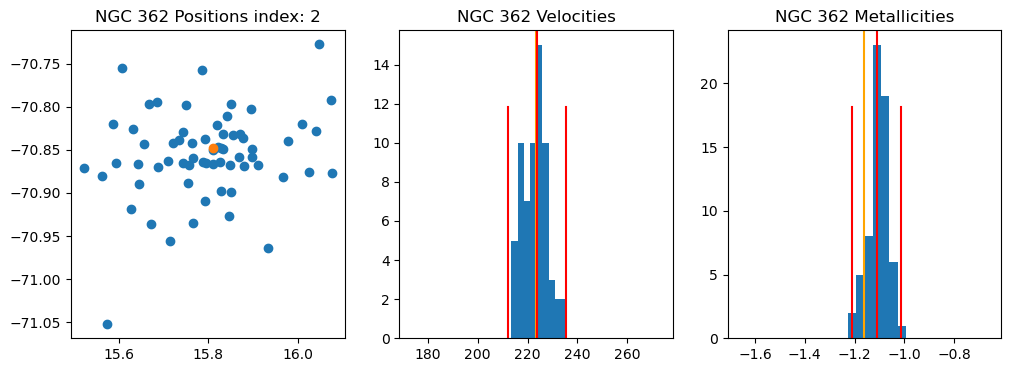

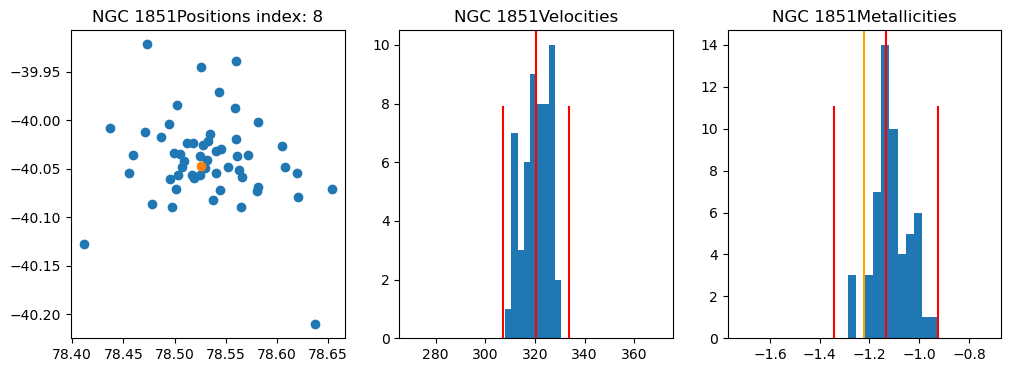

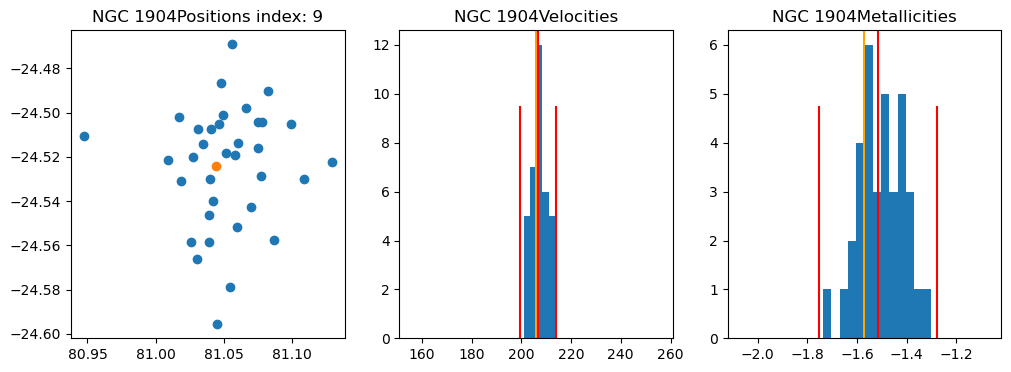

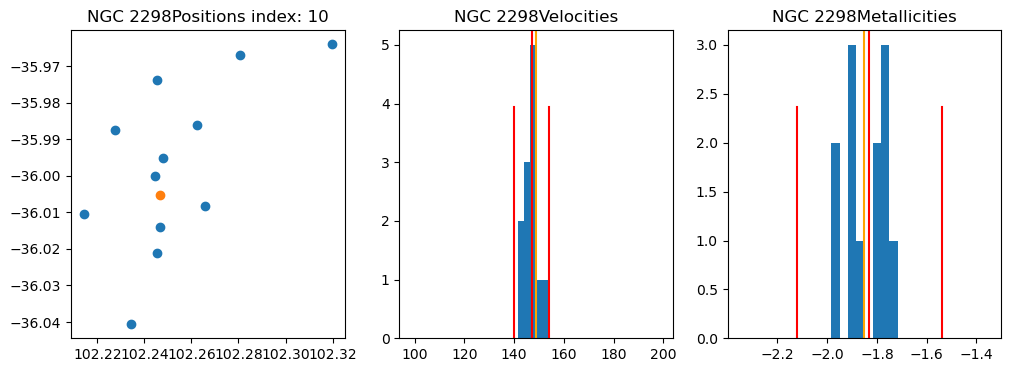

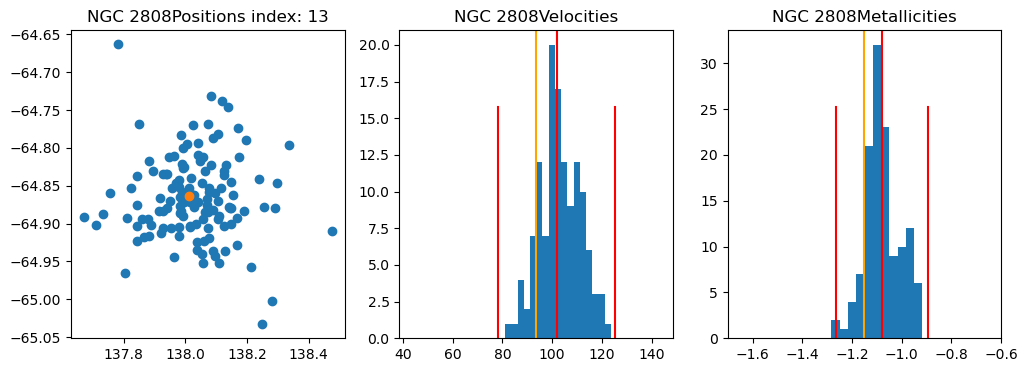

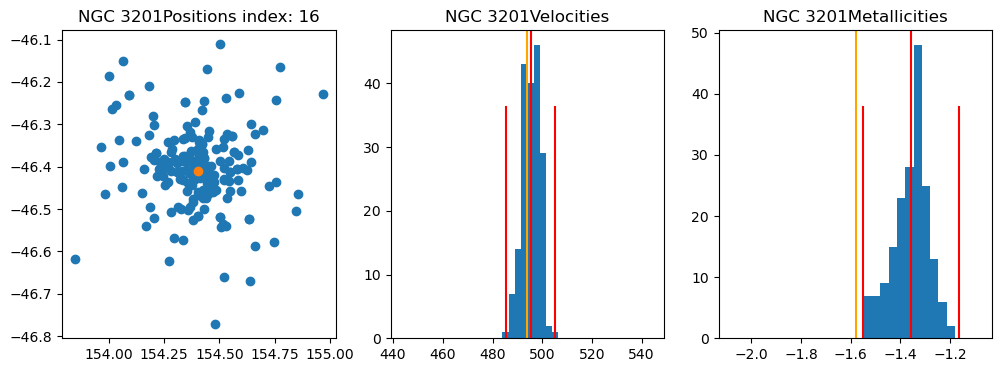

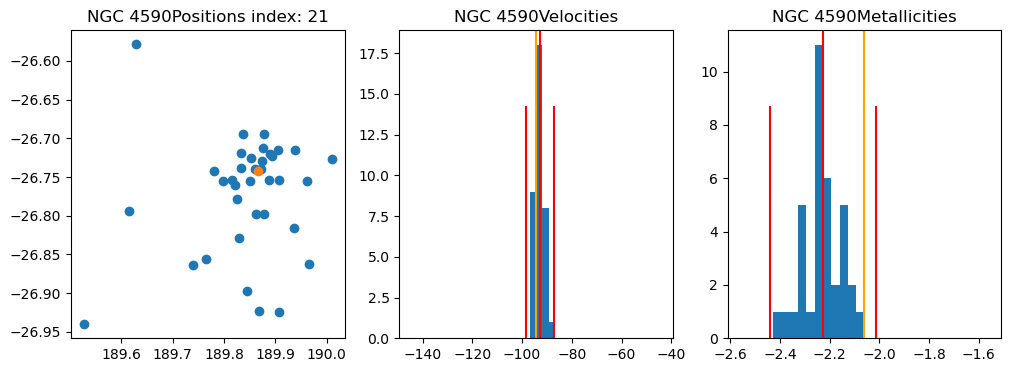

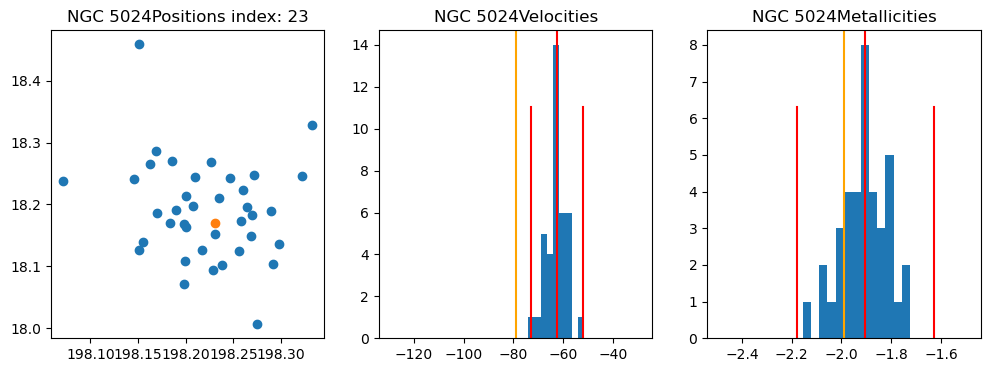

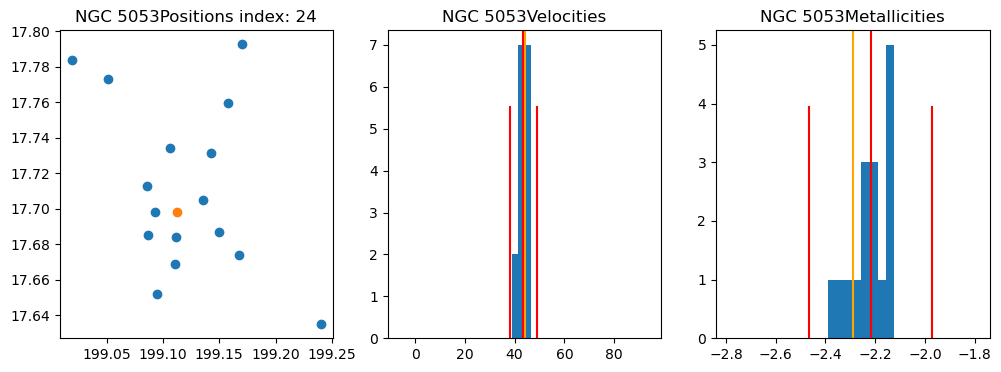

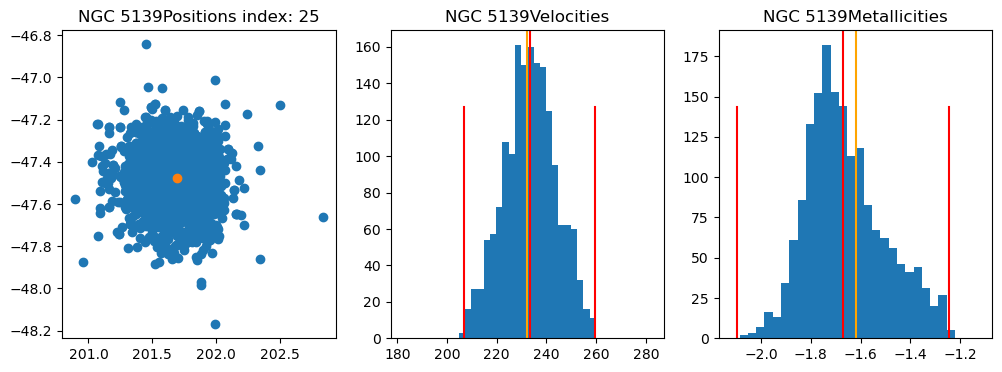

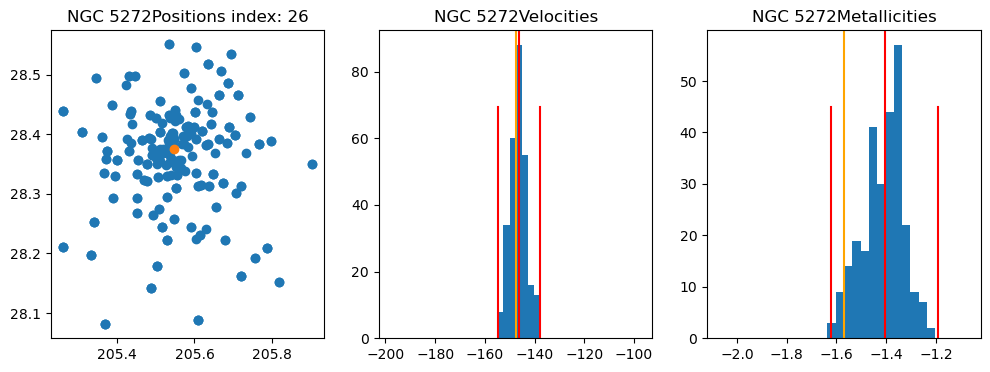

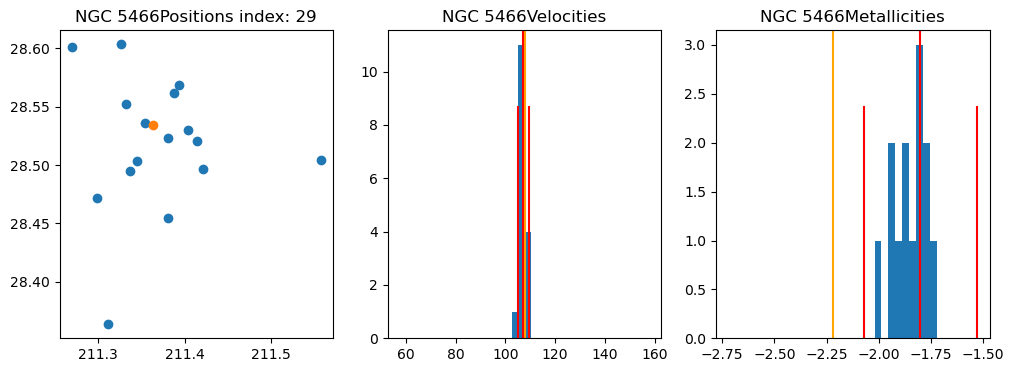

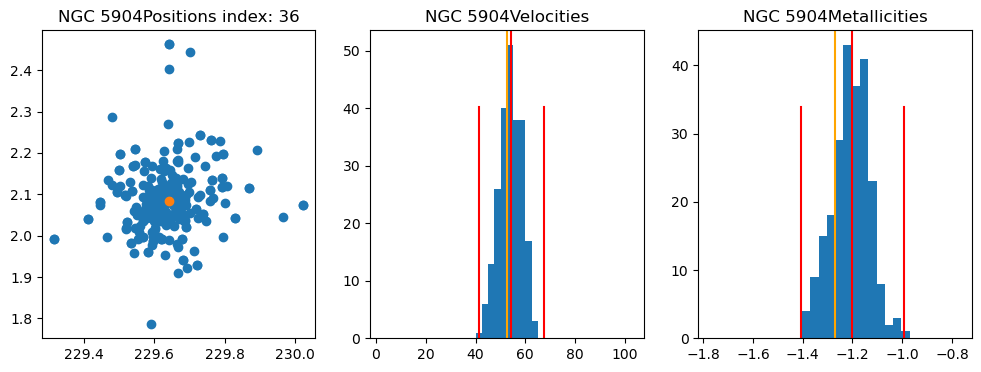

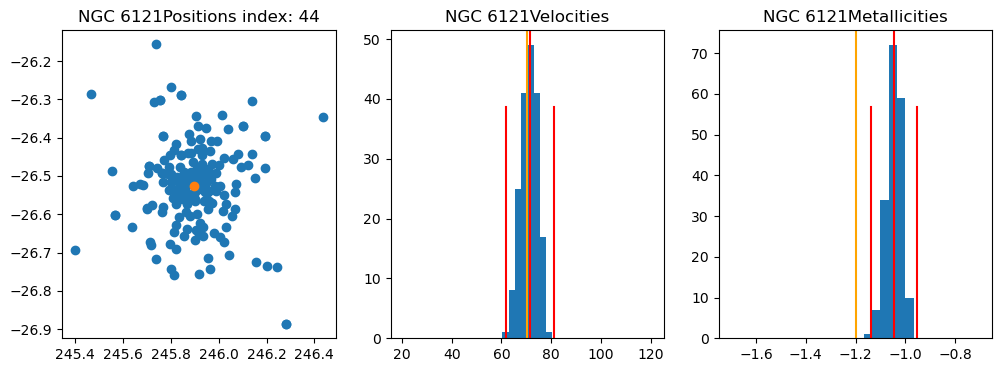

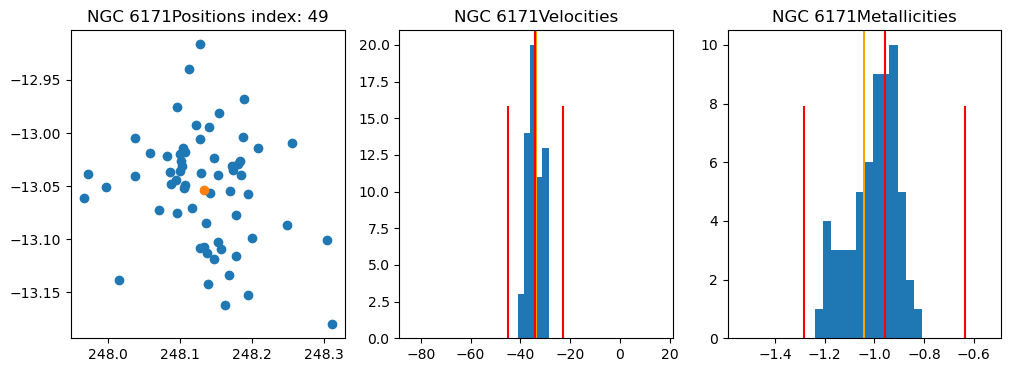

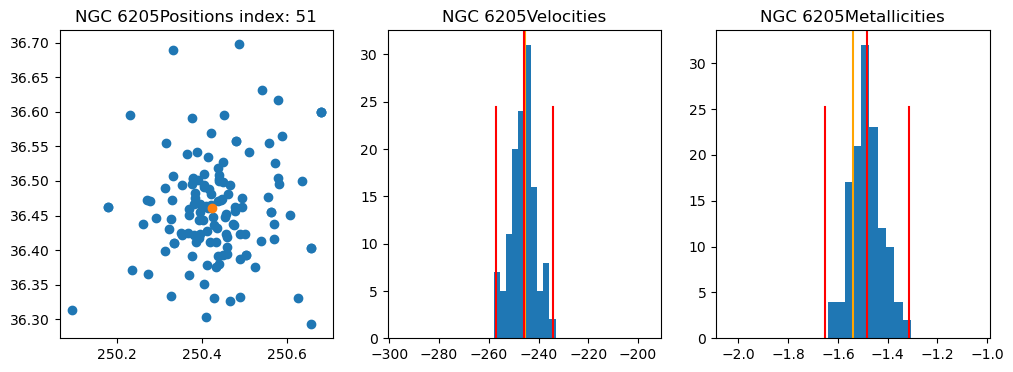

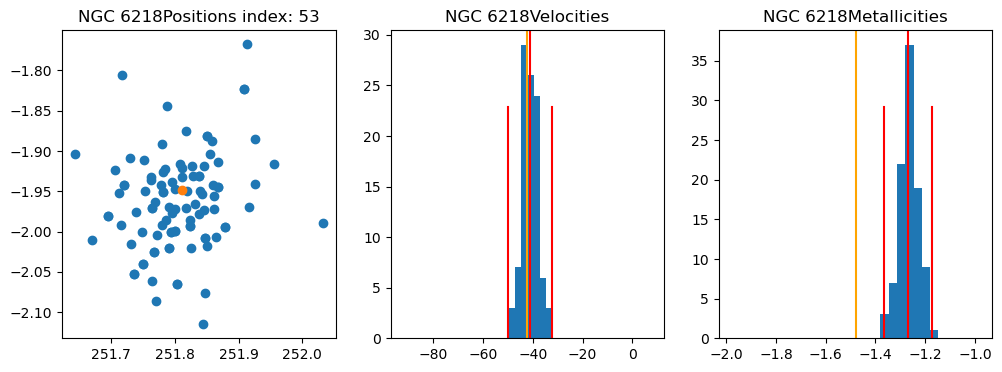

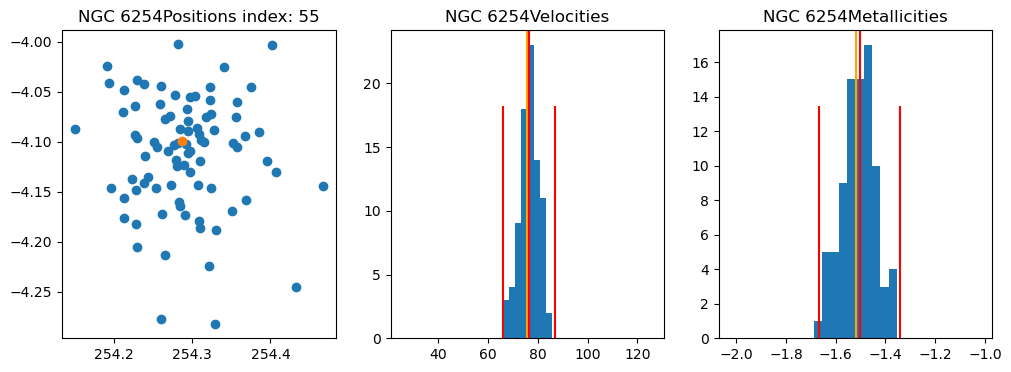

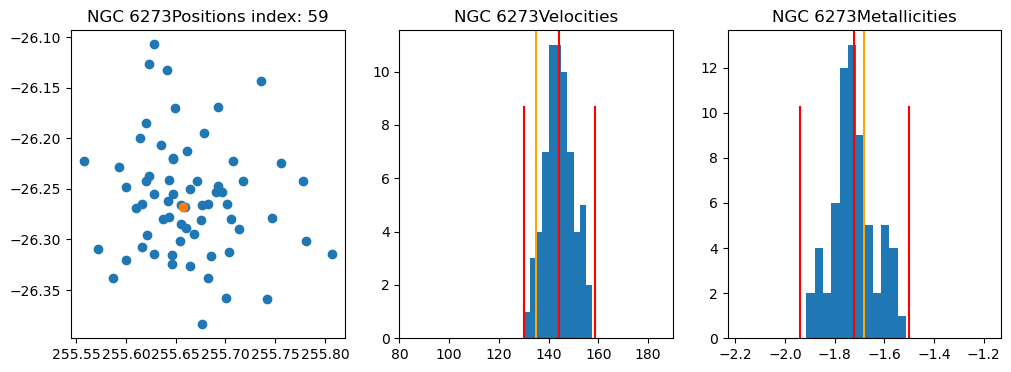

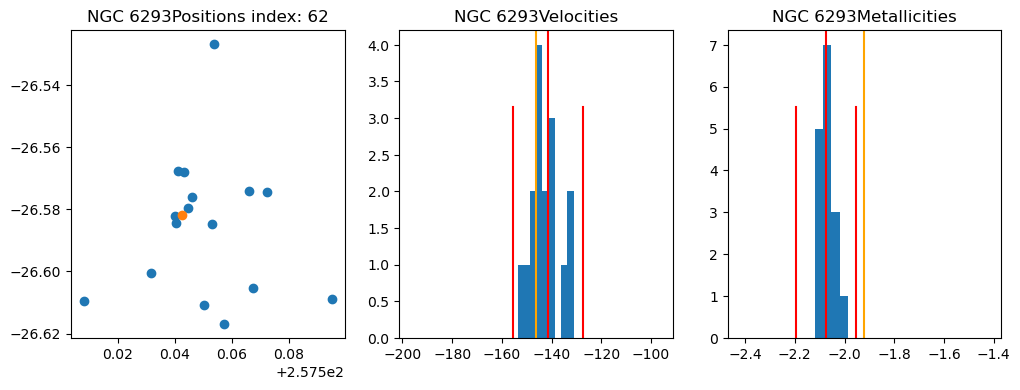

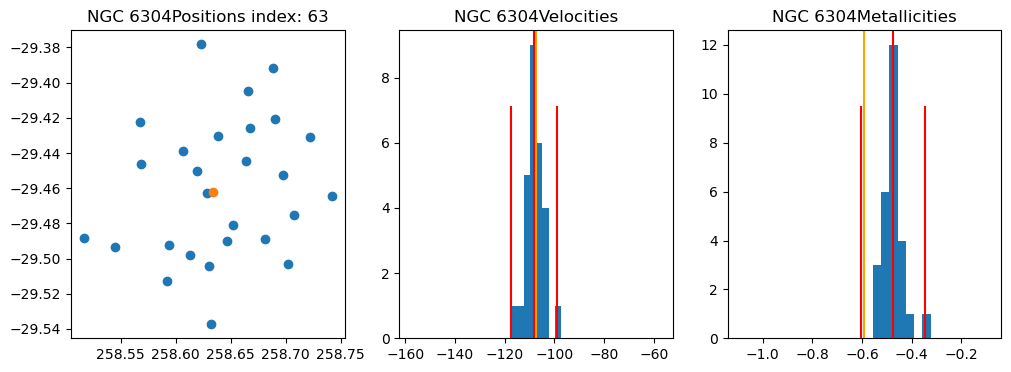

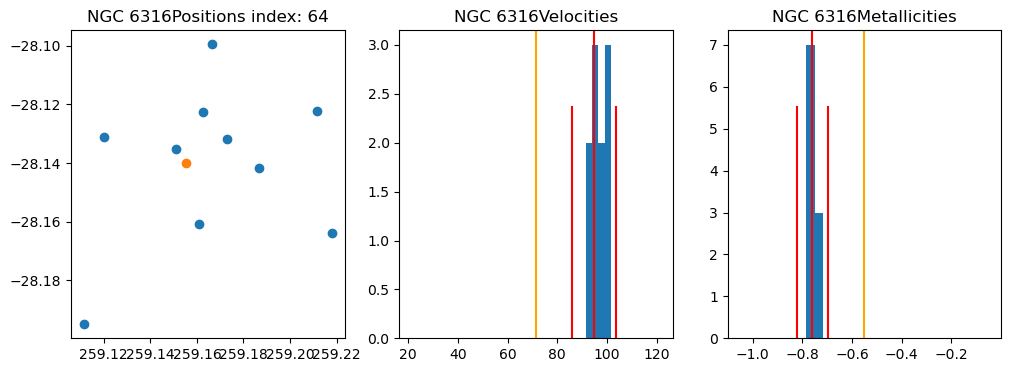

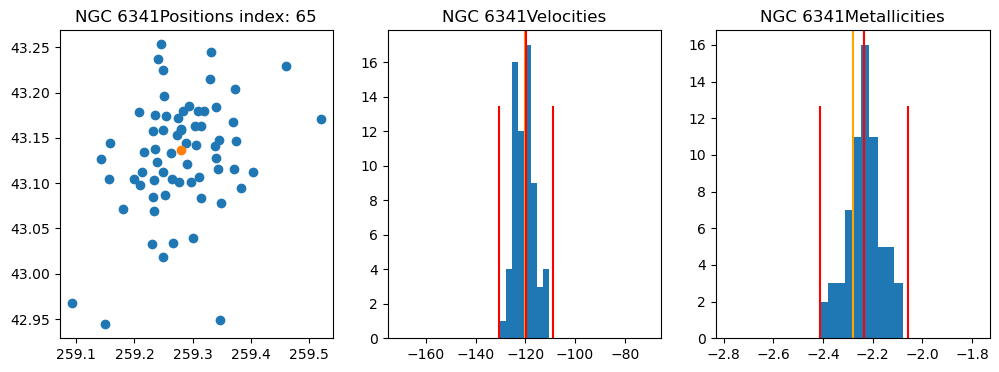

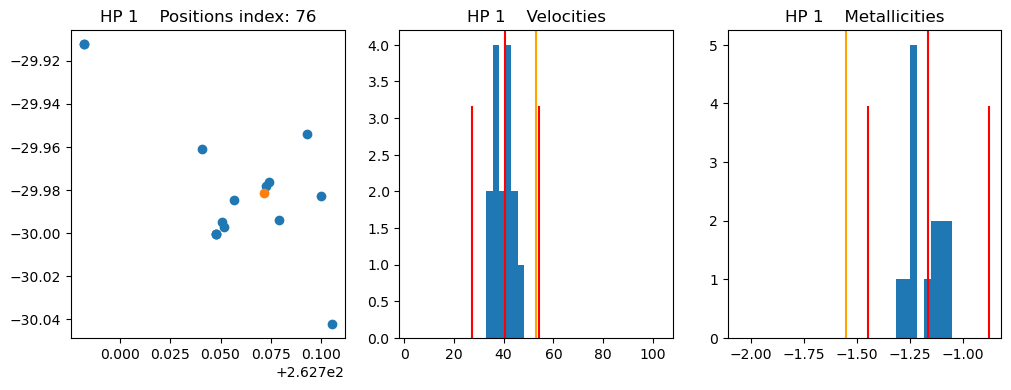

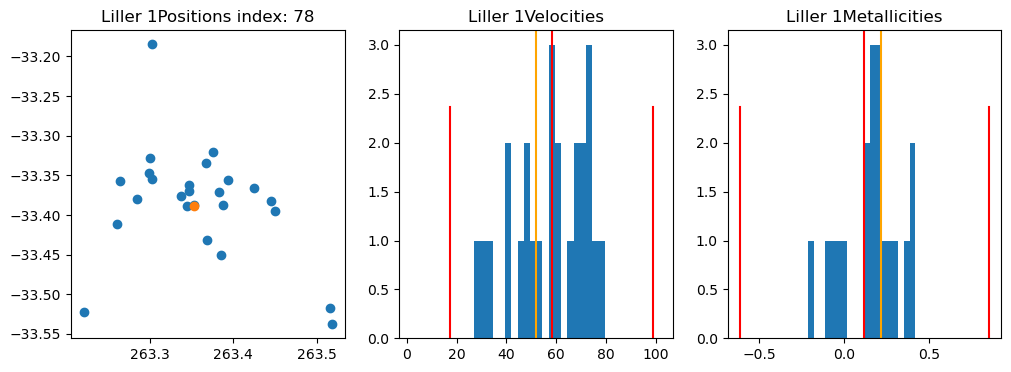

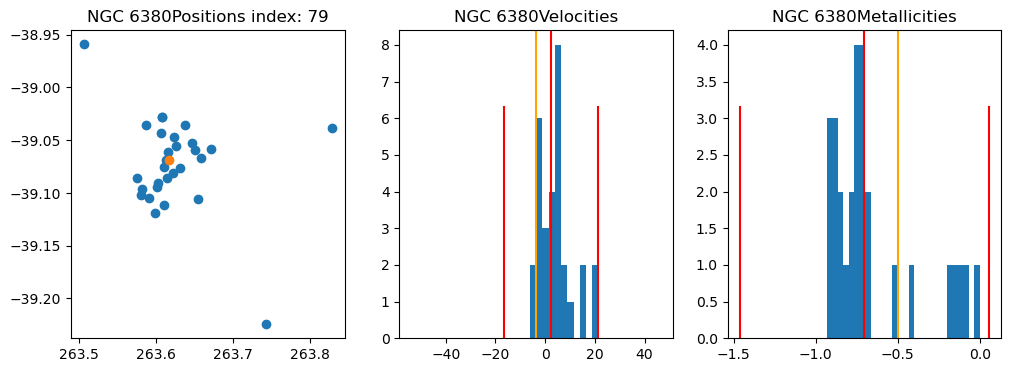

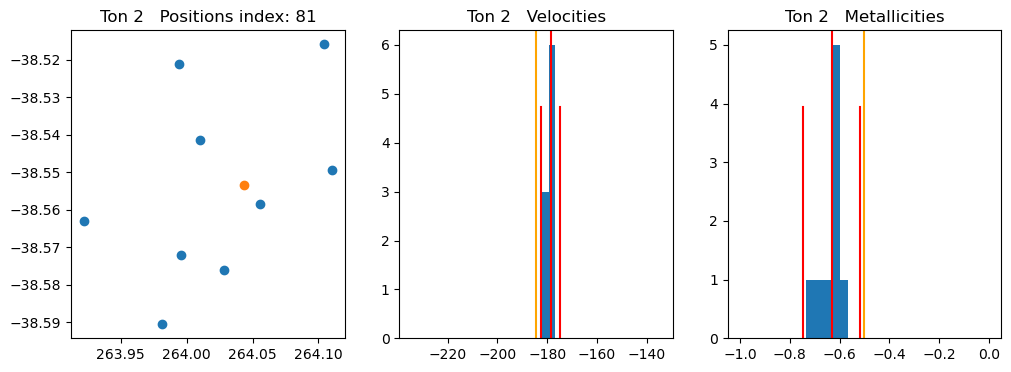

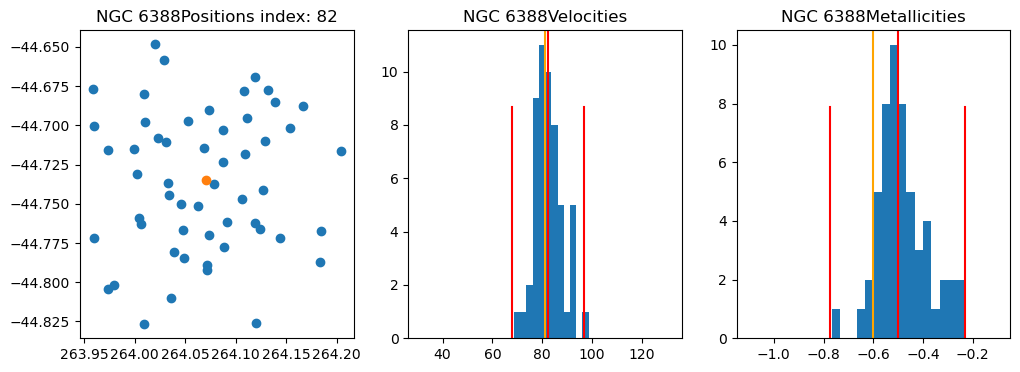

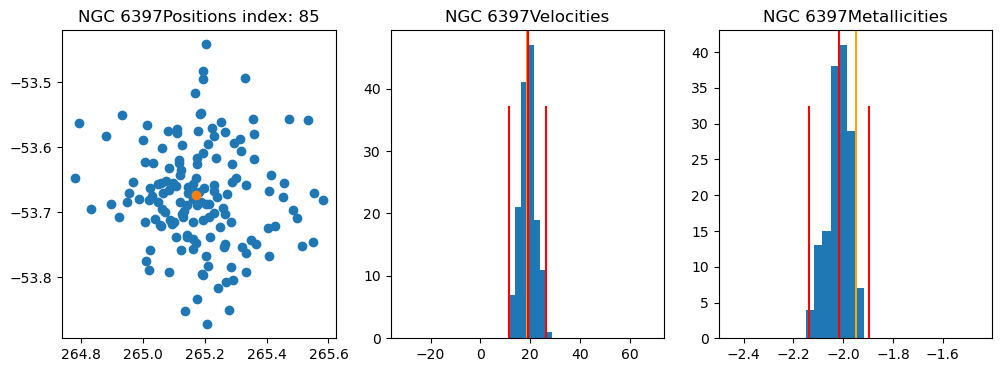

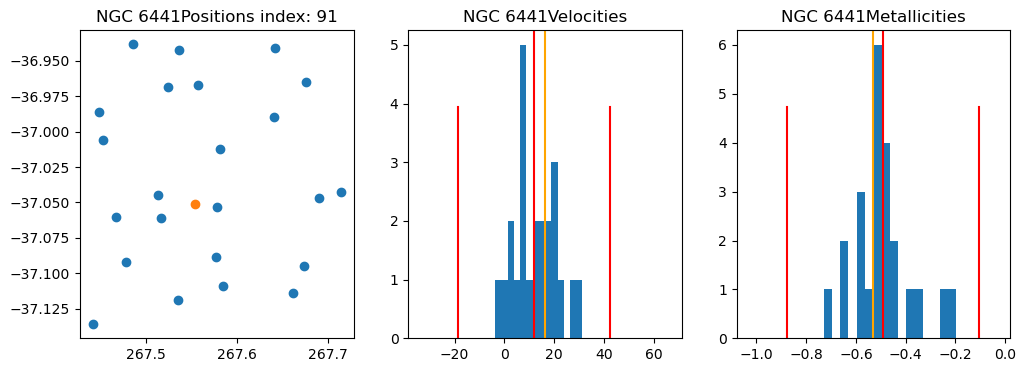

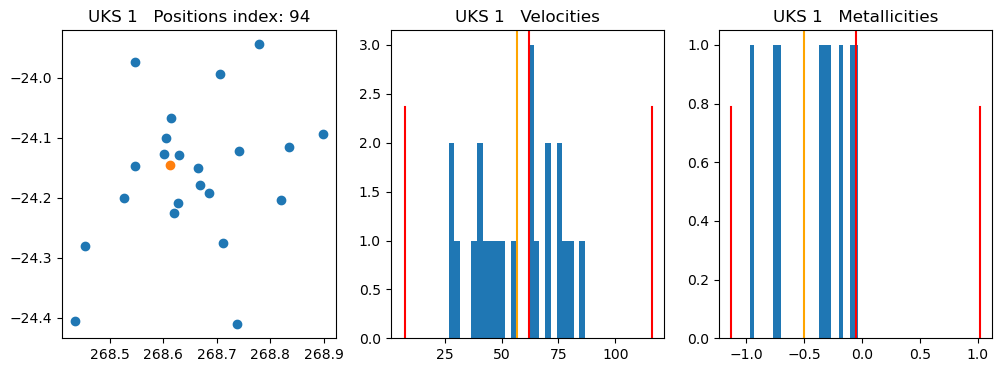

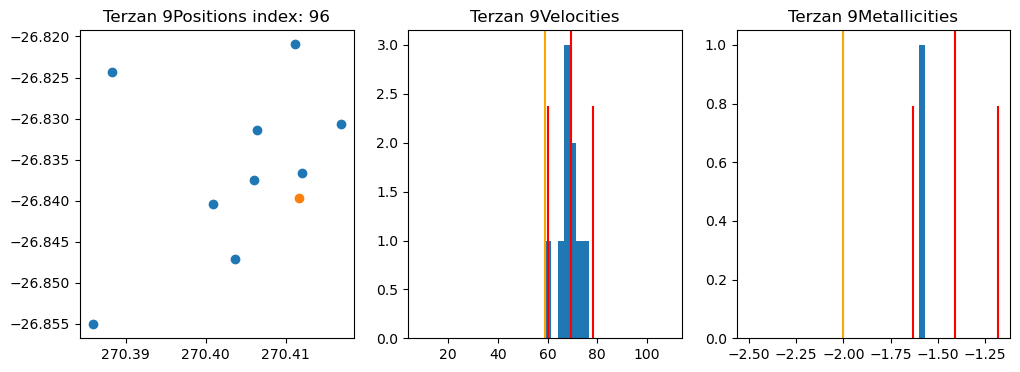

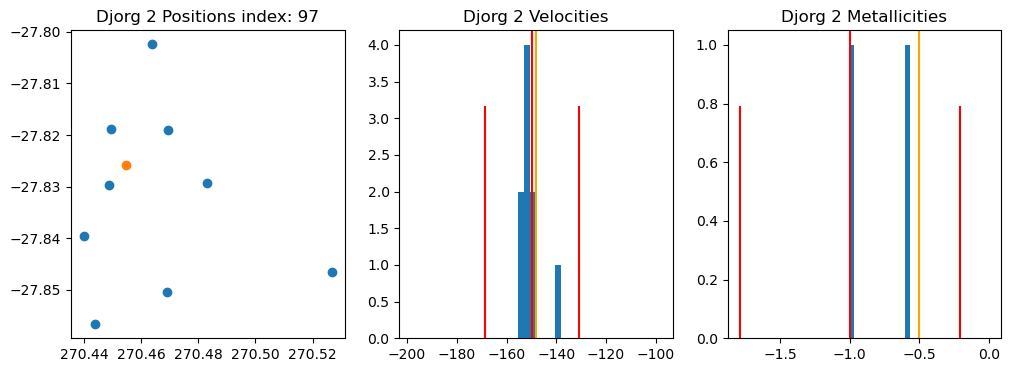

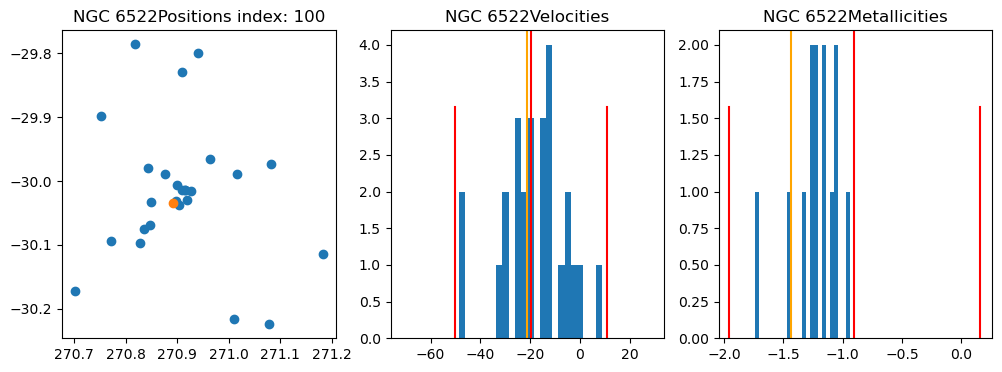

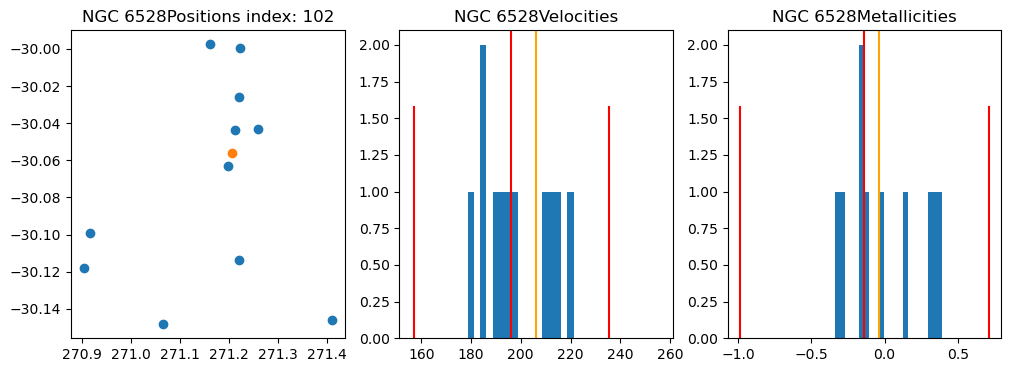

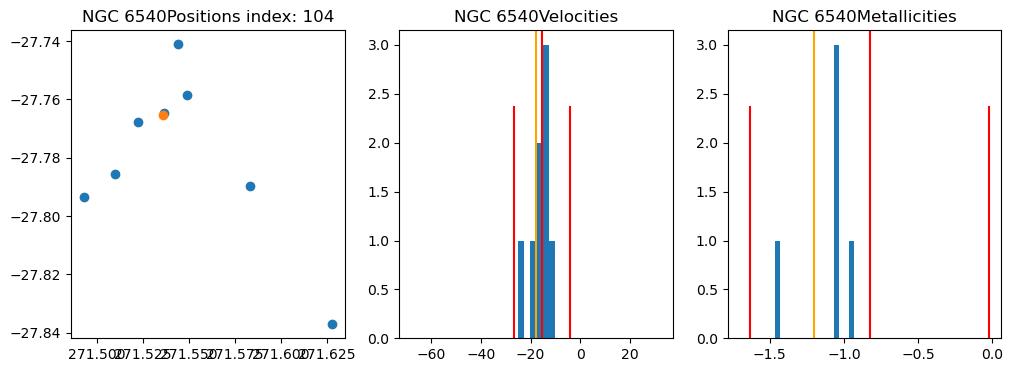

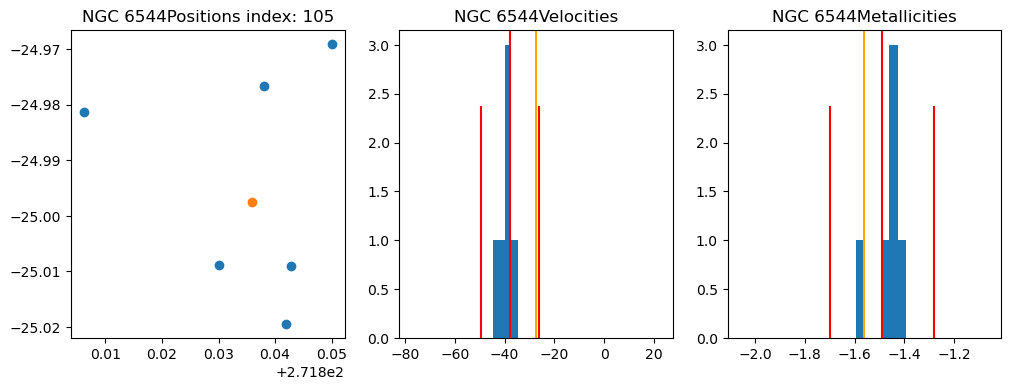

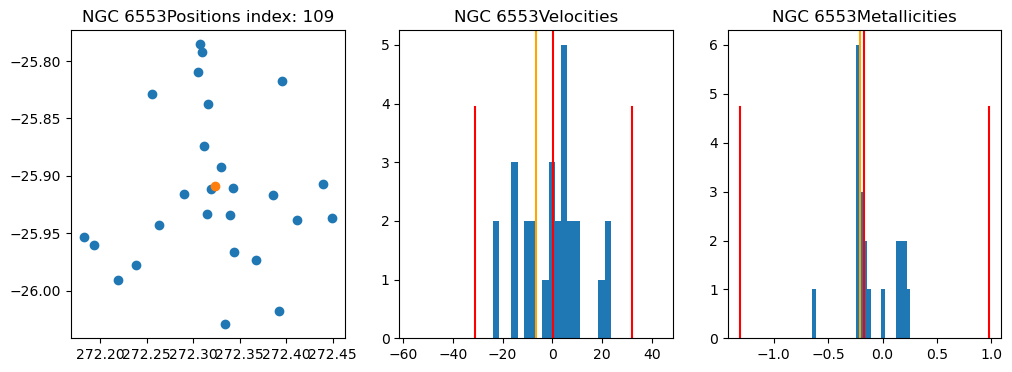

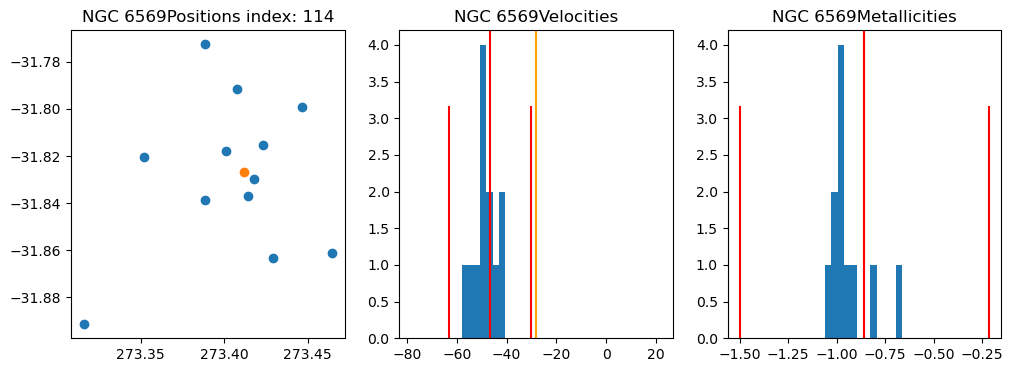

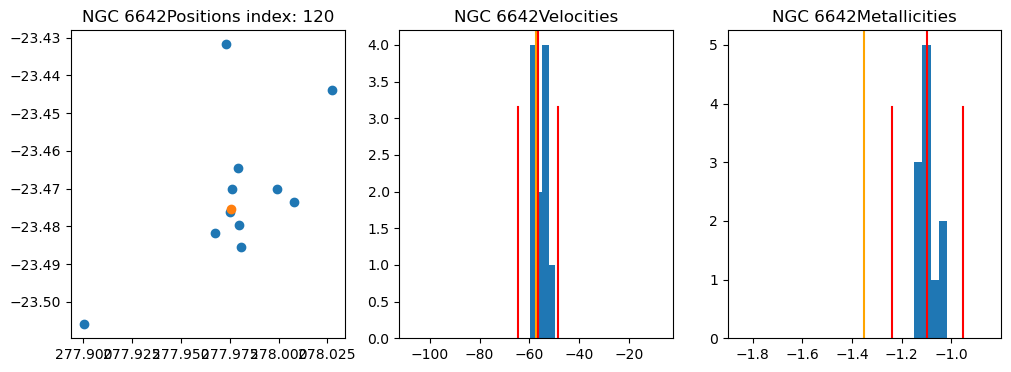

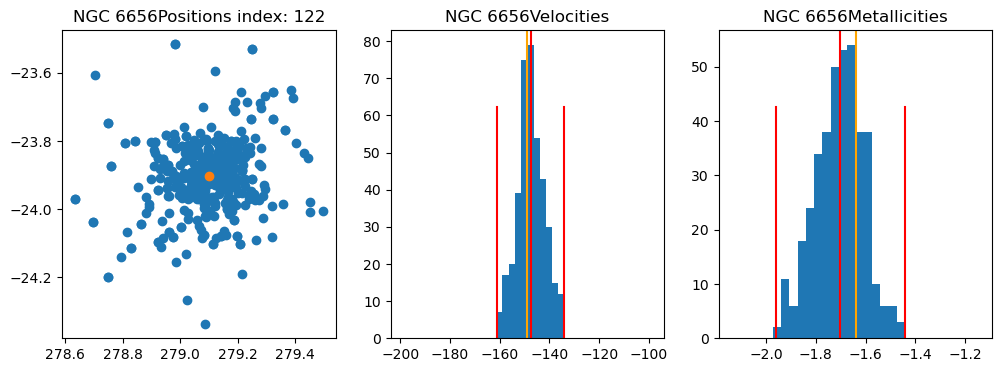

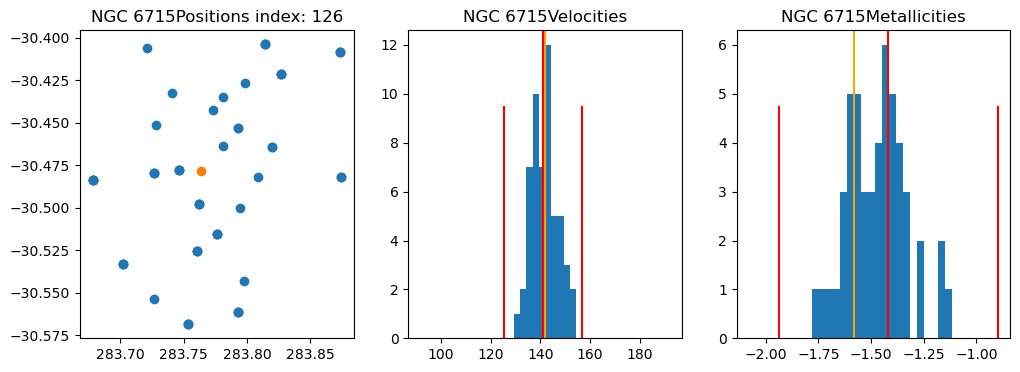

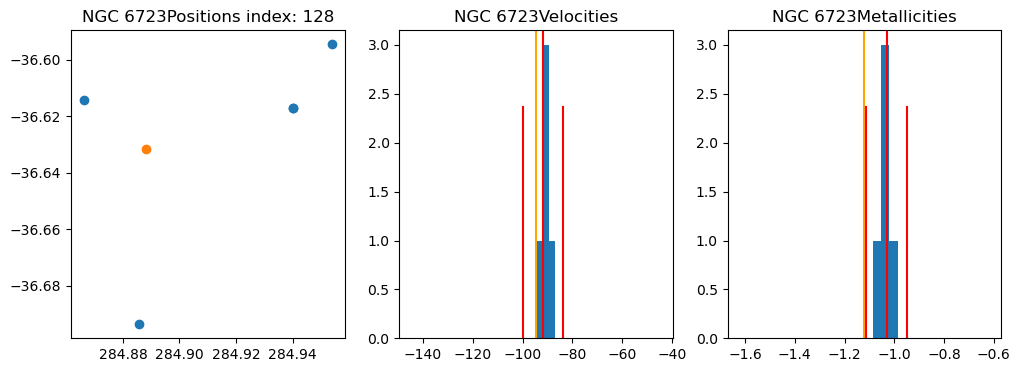

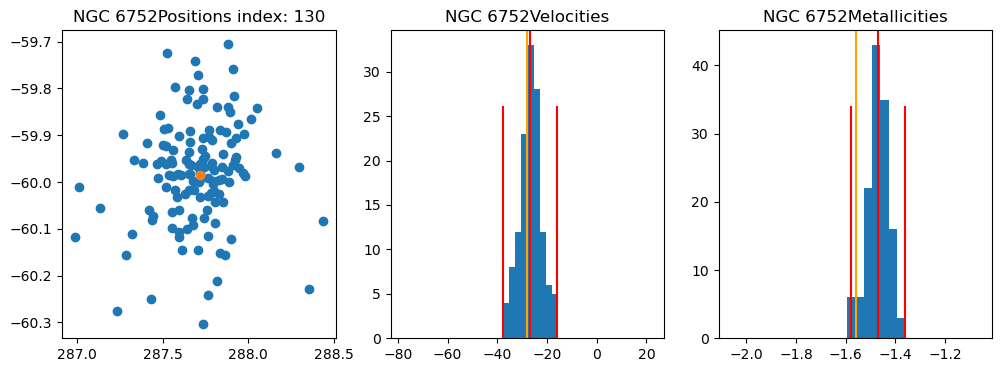

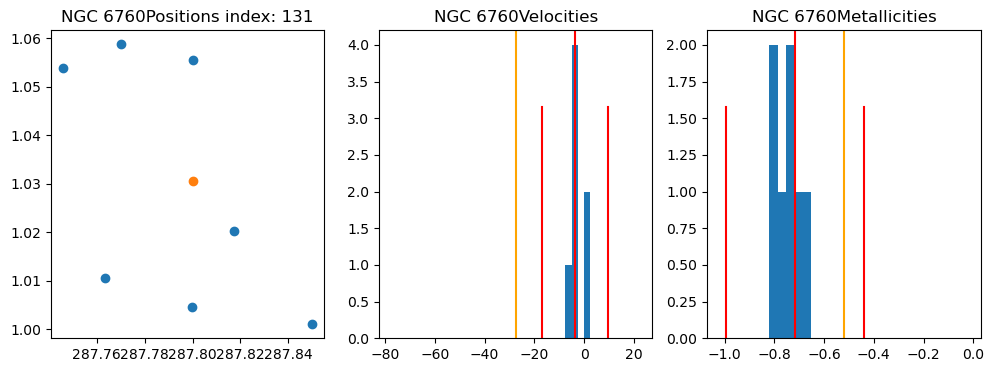

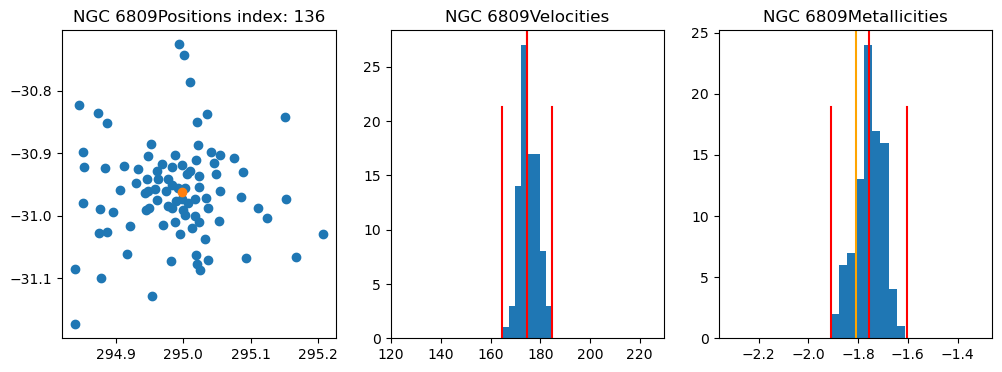

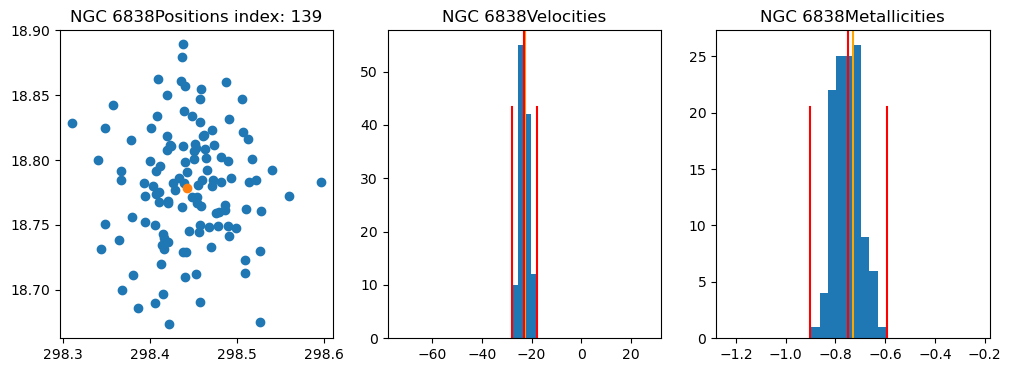

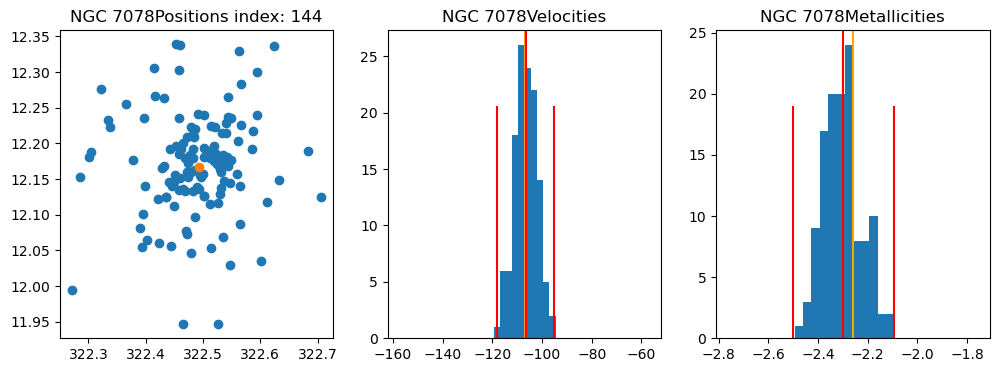

In [11]:
for i in range(len(stdclusters)):
    graphmin = glob_clust[i]["RV"] -50
    graphmax = graphmin + 100
    
    metalmin = glob_clust[i]["FEH"] - .5
    metalmax = metalmin + 1
    
    if(numberOfMatches[i]<10):
        continue
    
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.scatter(stdclusters[i]["RA"], stdclusters[i]["DEC"])
    plt.scatter(glob_clust[i]["RA"]*15, glob_clust[i]["DEC"])
    plt.title(glob_clust[i]["ID"] + "Positions" + " index: " + str(i))
    
    plt.subplot(132)
    plt.hist(stdclusters[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=40)
    plt.axvline(glob_clust[i]["RV"],0,1,color="orange")
    plt.axvline(medvel[i],0,1,color="red")
    plt.axvline(medvel[i] + stdvel[i]*2.5,0,.75,color="red")
    plt.axvline(medvel[i] - stdvel[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Velocities")
    
    plt.subplot(133)
    plt.hist(stdclusters[i]["FE_H"],range=[metalmin,metalmax],bins=30)
    plt.axvline(glob_clust[i]["FEH"],0,1,color="orange")
    plt.axvline(medmet[i],0,1,color="red")
    plt.axvline(medmet[i] + stdmet[i]*2.5,0,.75,color="red")
    plt.axvline(medmet[i] - stdmet[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Metallicities")
    plt.show()

In [12]:
std2clusters = [0]*150

for i in range(len(cluster_stars)):
    #curclust = []
    #for j in range(len(cluster_stars[i])):
        #if((cluster_stars[i][j]["VHELIO_AVG"] < (medvel[i]+stdvel[i]*2.5)) and (cluster_stars[i][j]["VHELIO_AVG"] > (medvel[i]-stdvel[i]*2.5))):
           #curclust.append(cluster_stars[i][j])
           
    #stdclusters[i] = curclust
    
    
    curclust = cluster_stars[i]
    
    ind1, = np.where(curclust["VHELIO_AVG"] < (medvel[i]+stdvel[i]*2.5))
    curclust = curclust[ind1]
    ind2, = np.where(curclust["VHELIO_AVG"] > (medvel[i]-stdvel[i]*2.5))
    curclust = curclust[ind2]
    
    
    
    ind3, = np.where(curclust["FE_H"] < (medmet[i]+stdmet[i]*2.5))
    curclust = curclust[ind3]
    ind4, = np.where(curclust["FE_H"] > (medmet[i]-stdmet[i]*2.5))
    curclust = curclust[ind4]
    
    std2clusters[i] = curclust

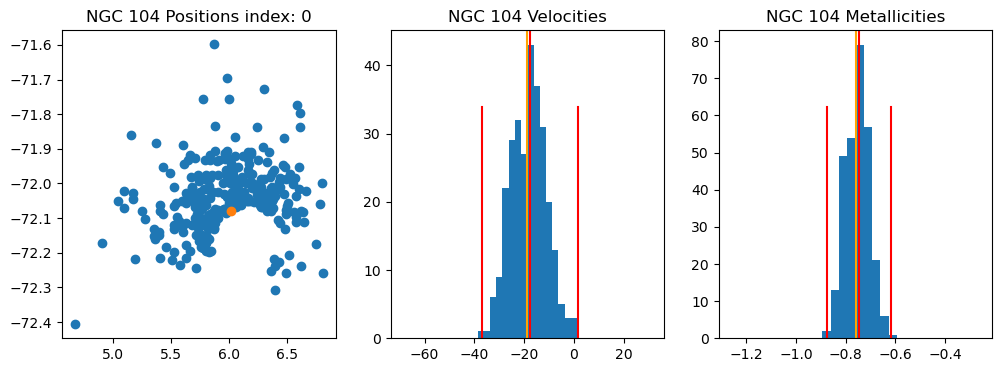

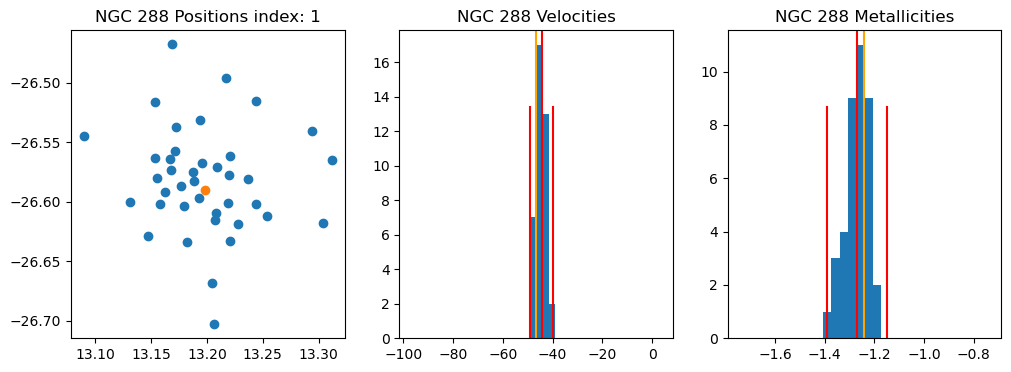

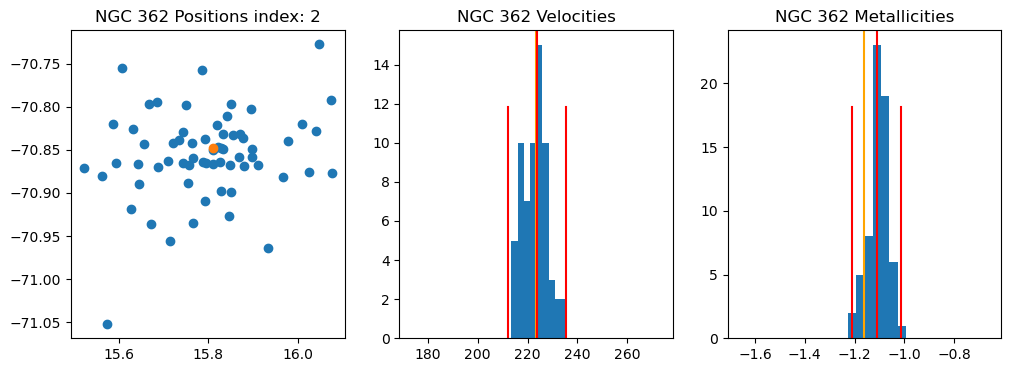

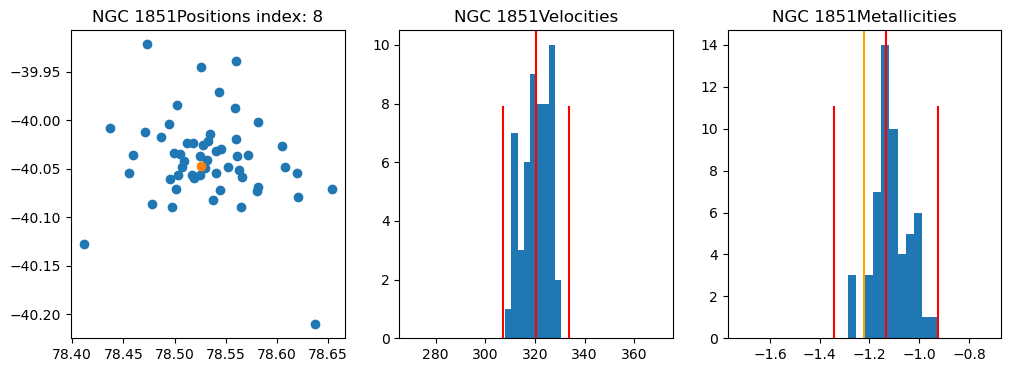

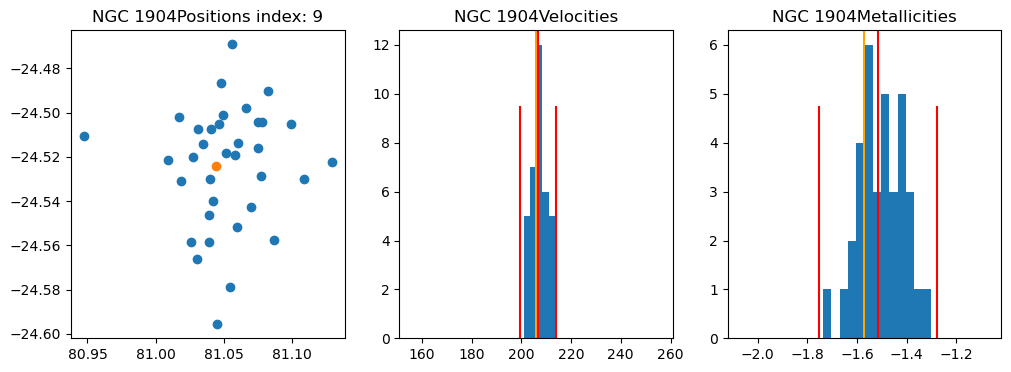

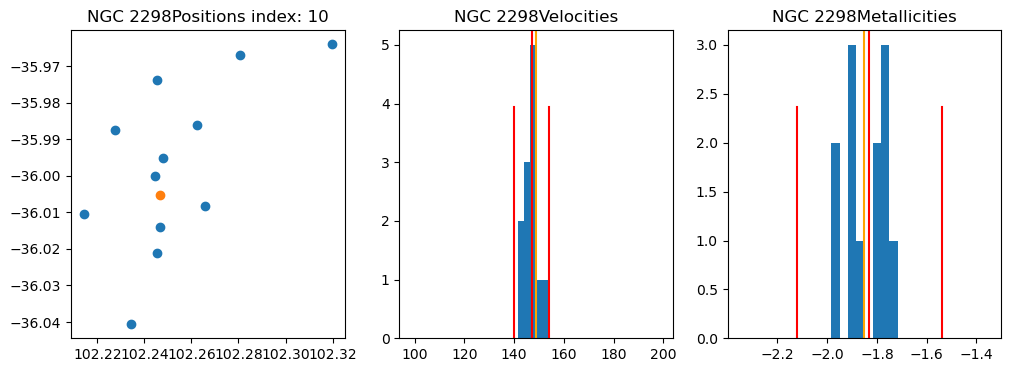

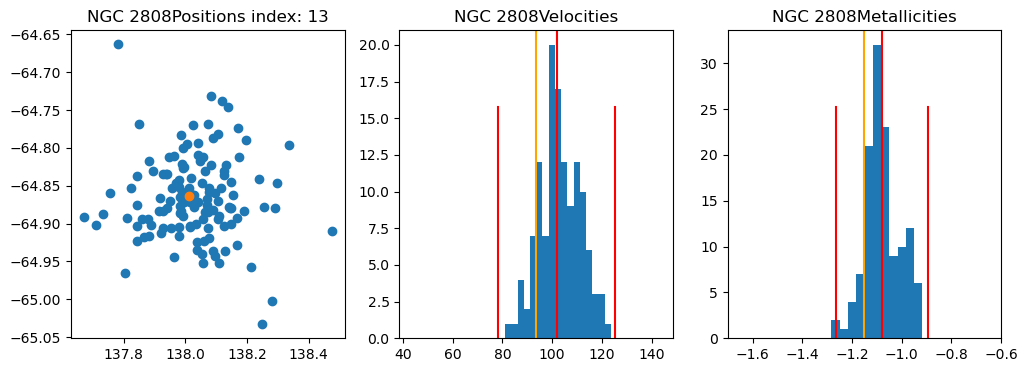

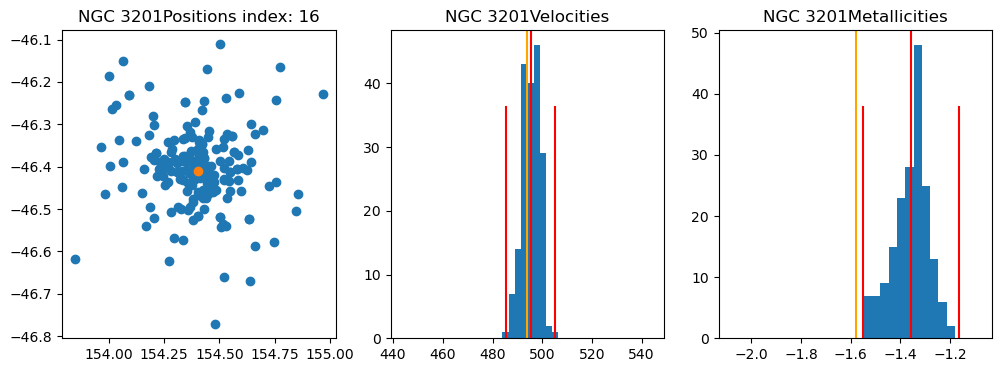

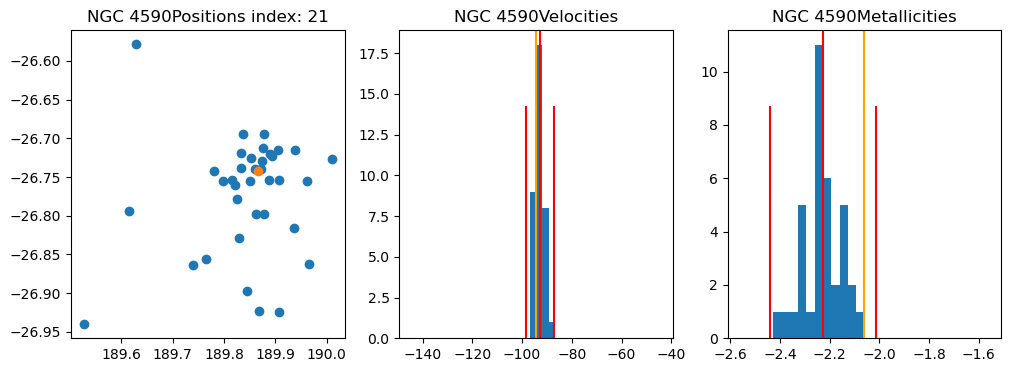

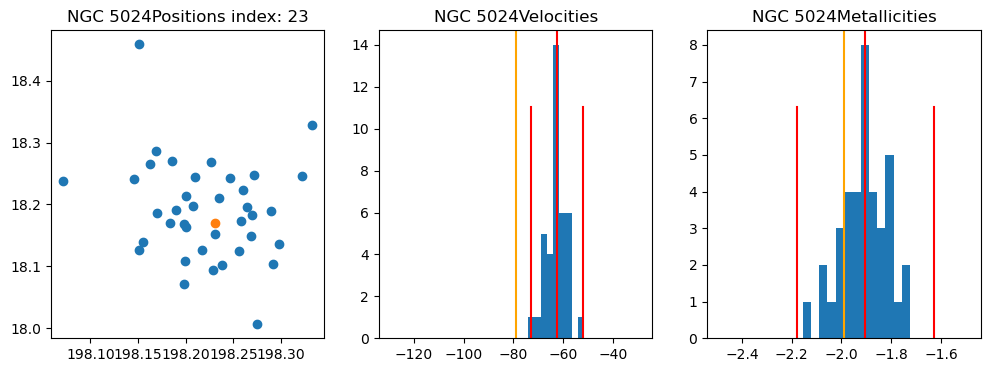

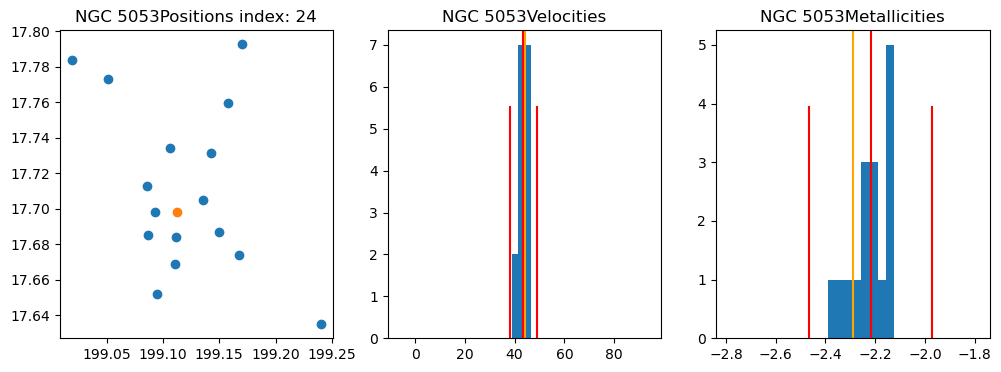

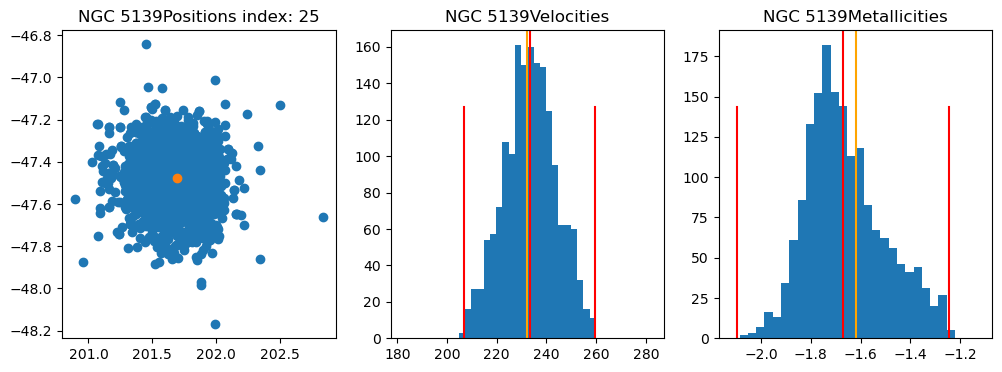

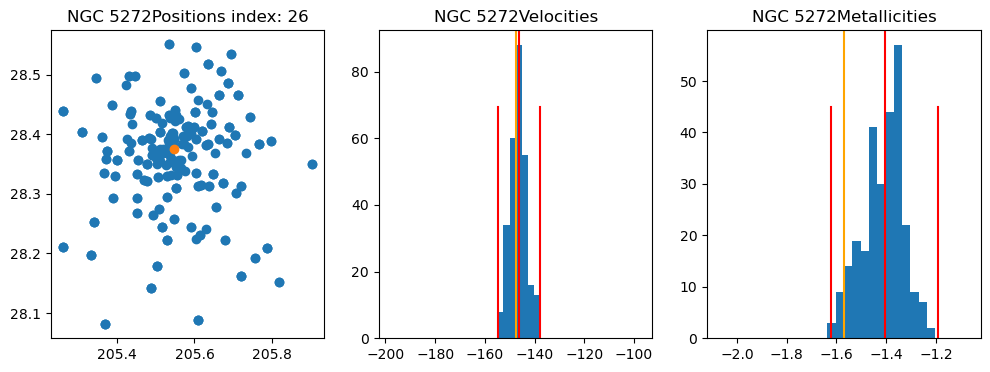

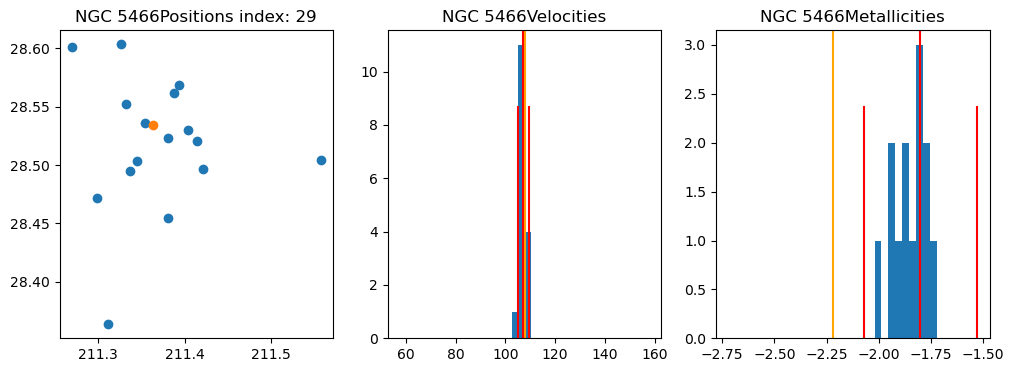

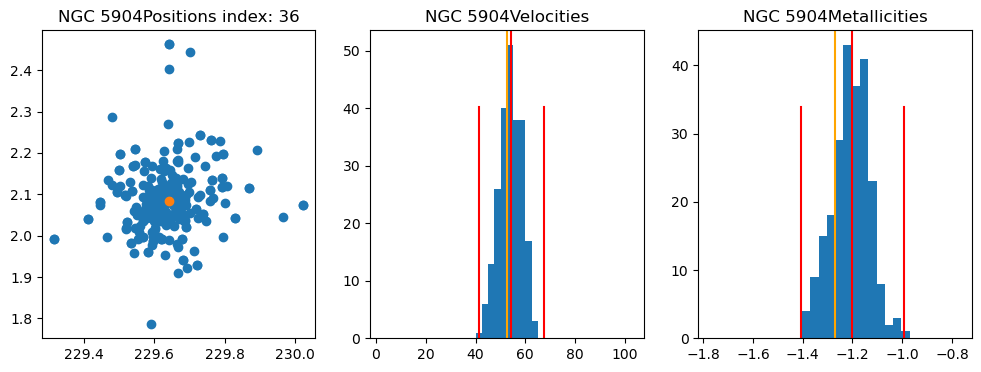

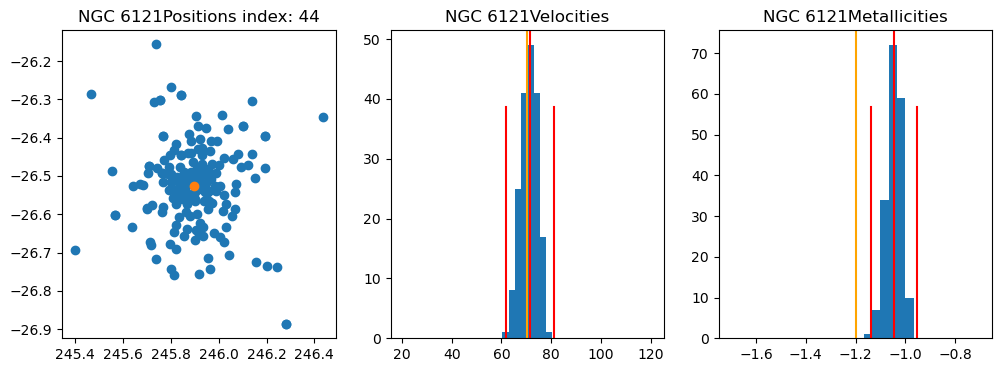

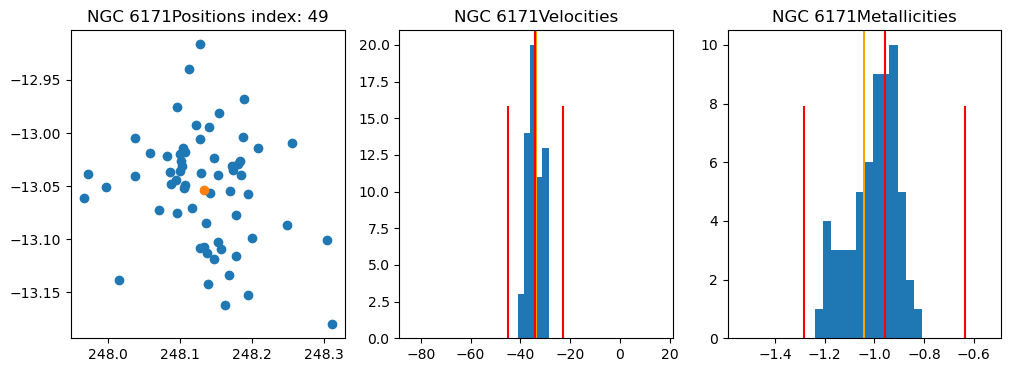

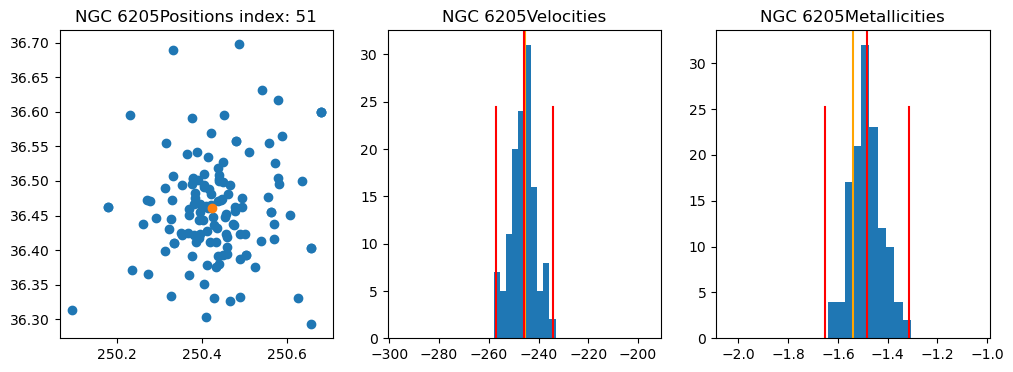

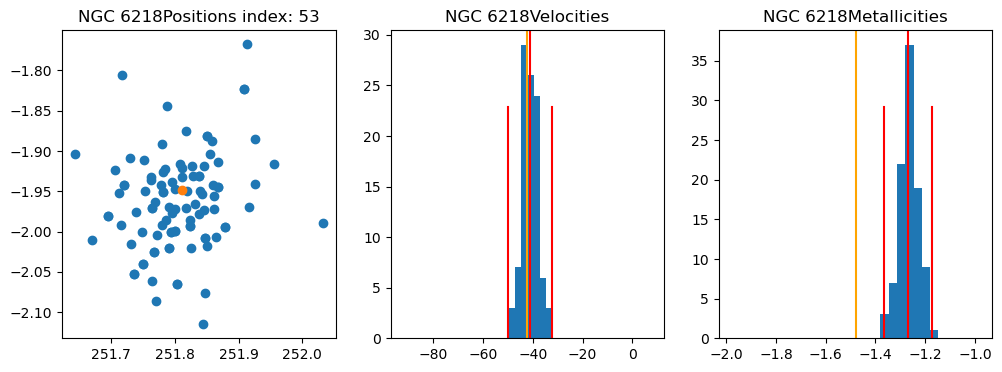

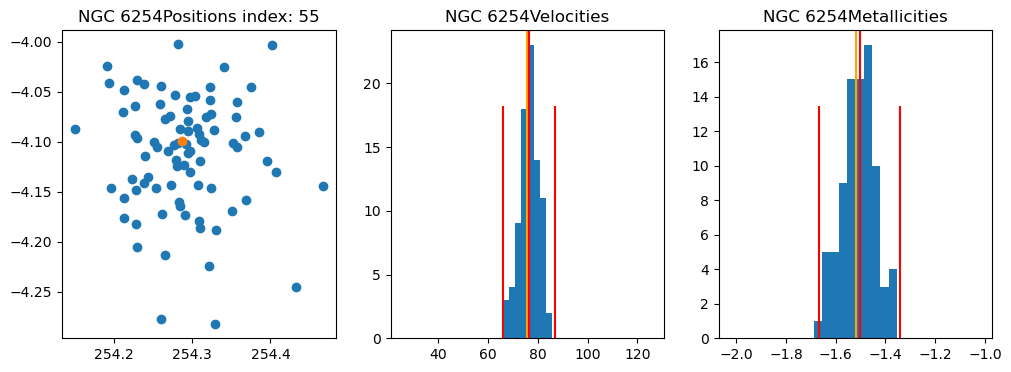

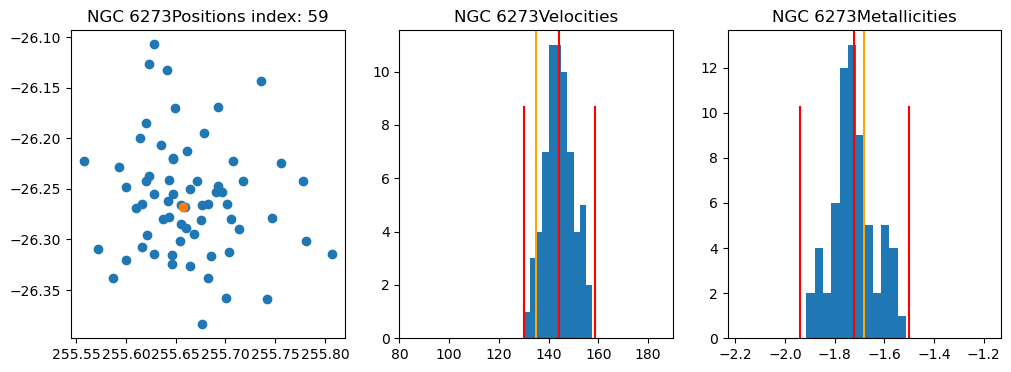

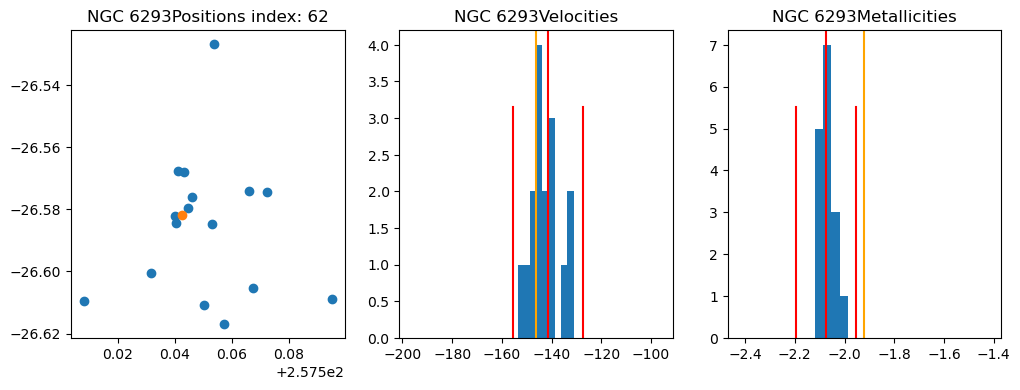

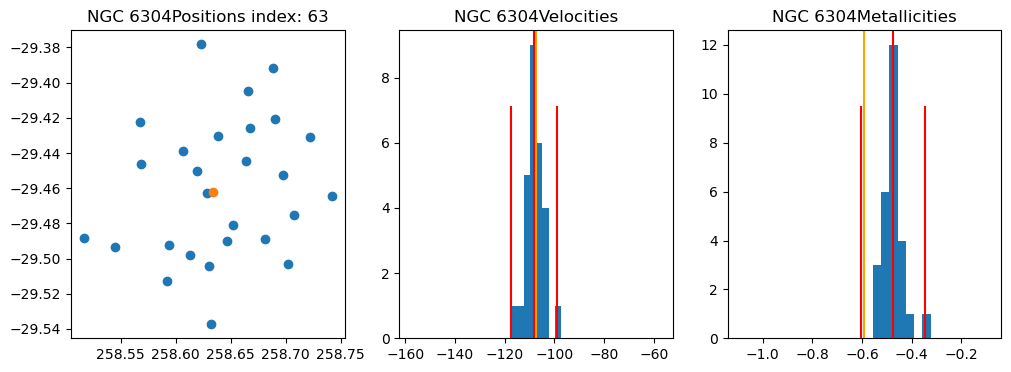

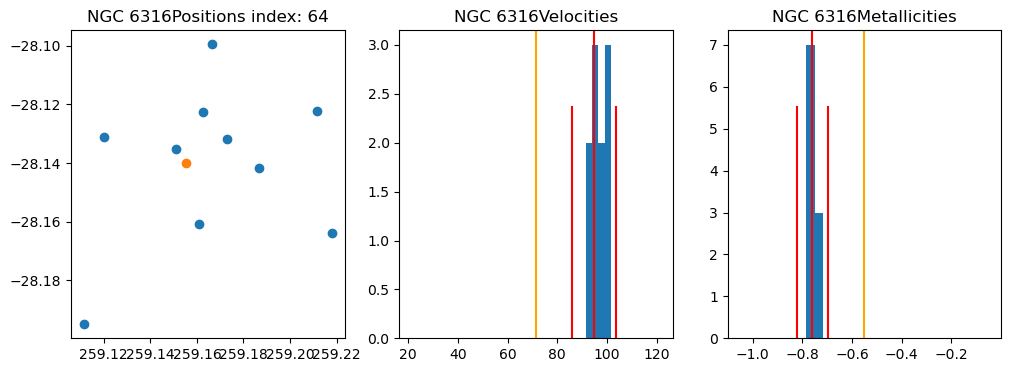

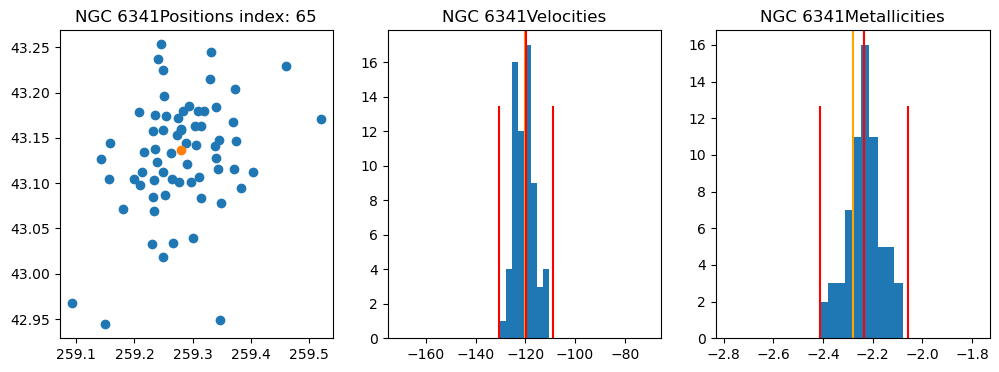

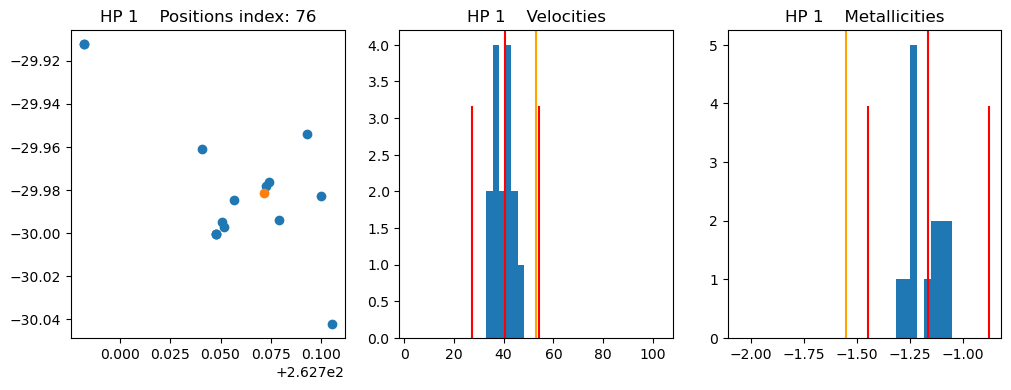

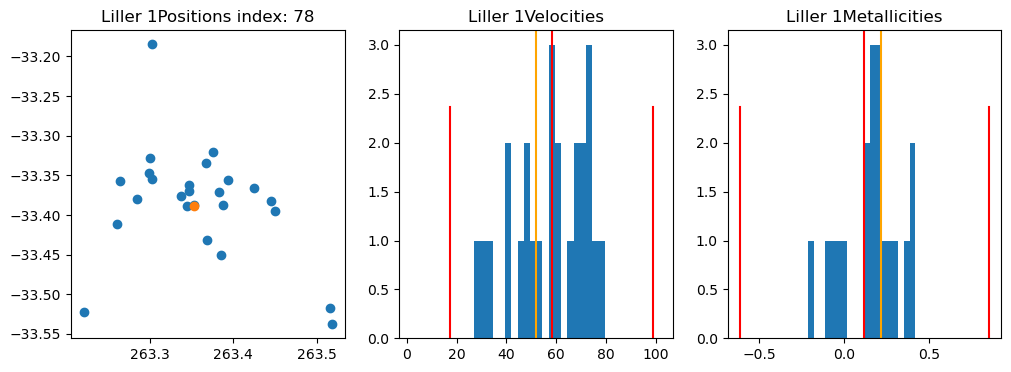

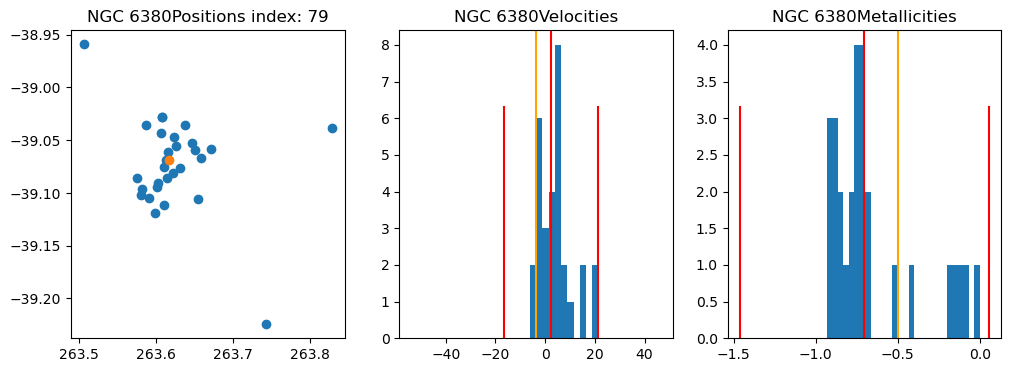

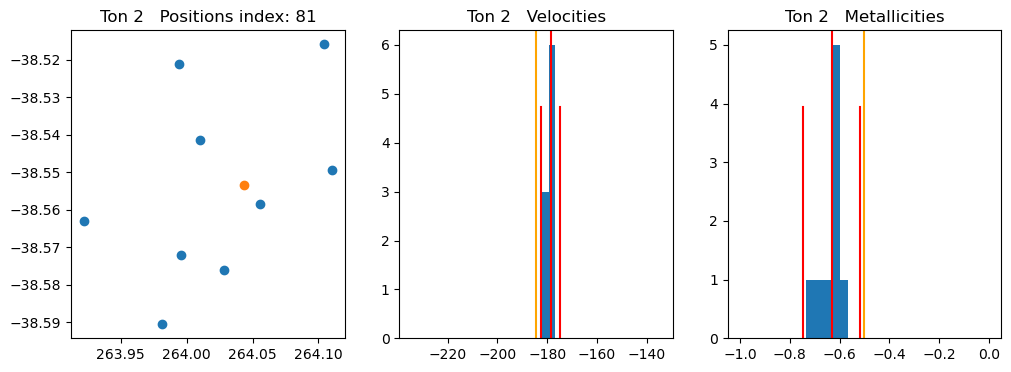

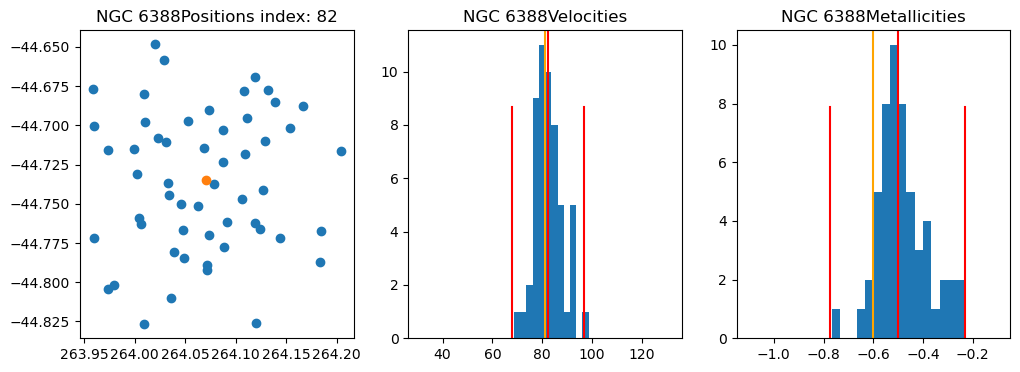

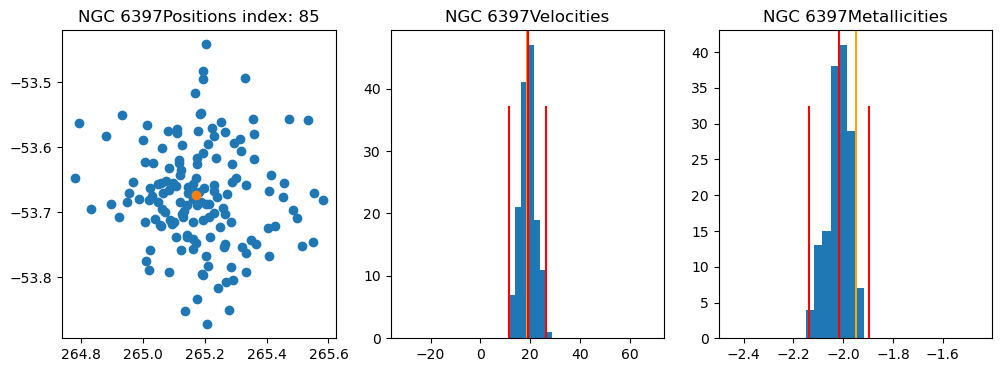

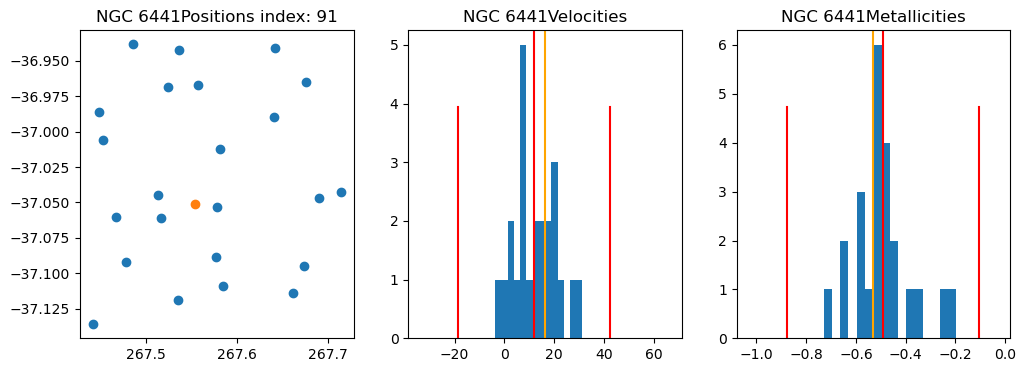

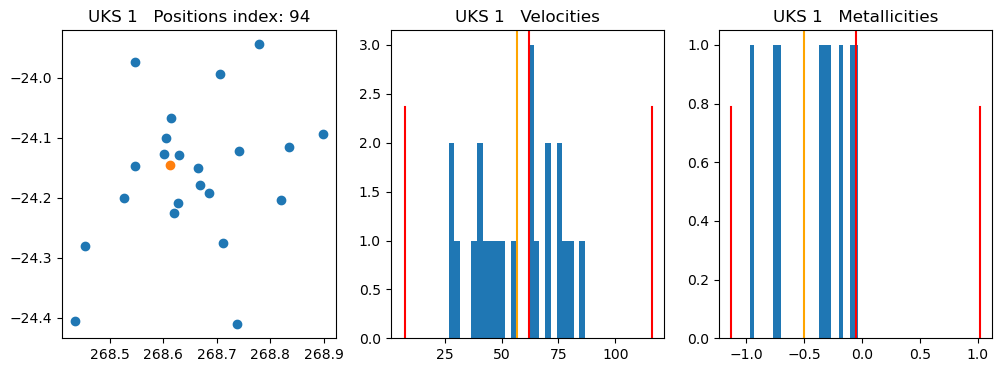

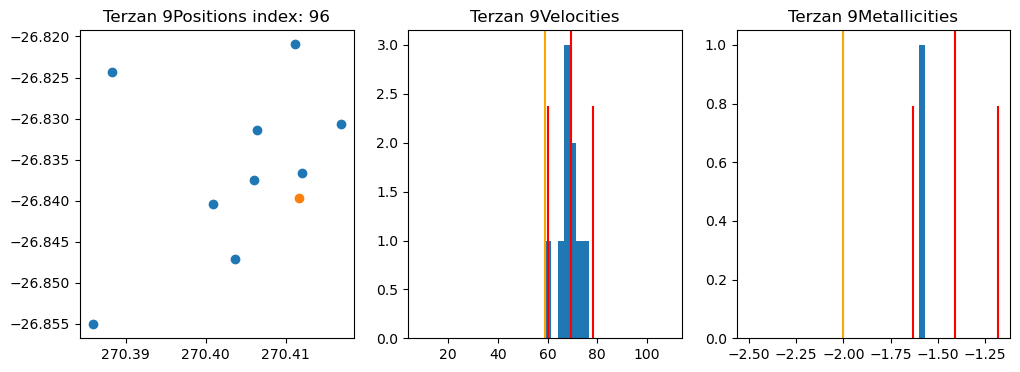

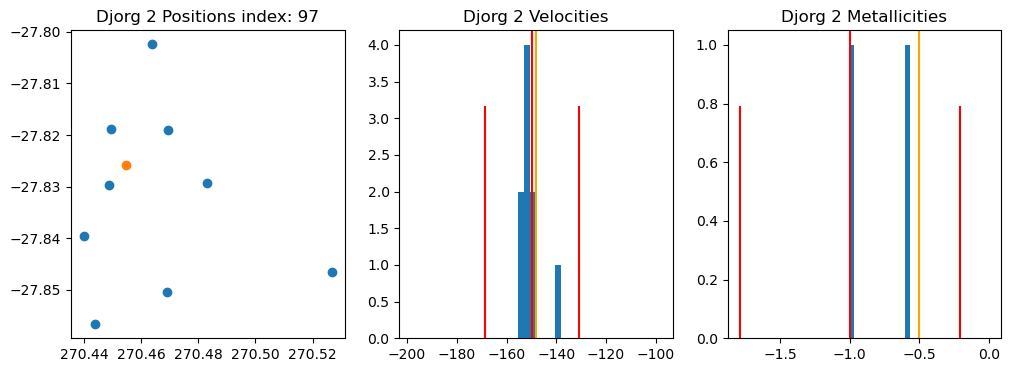

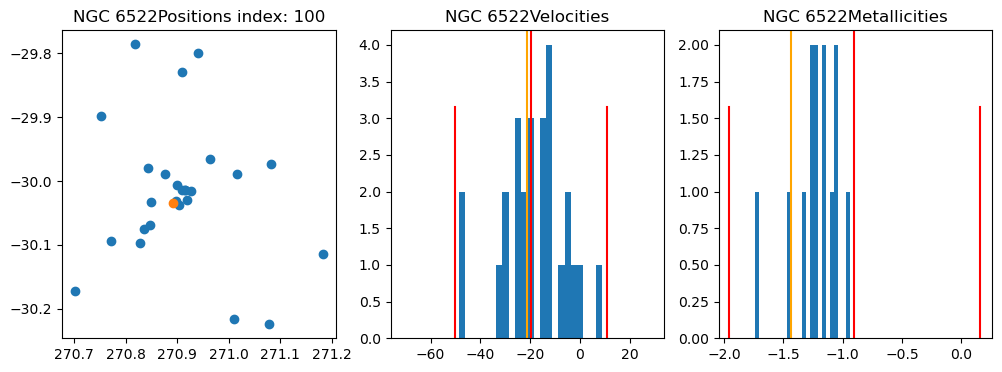

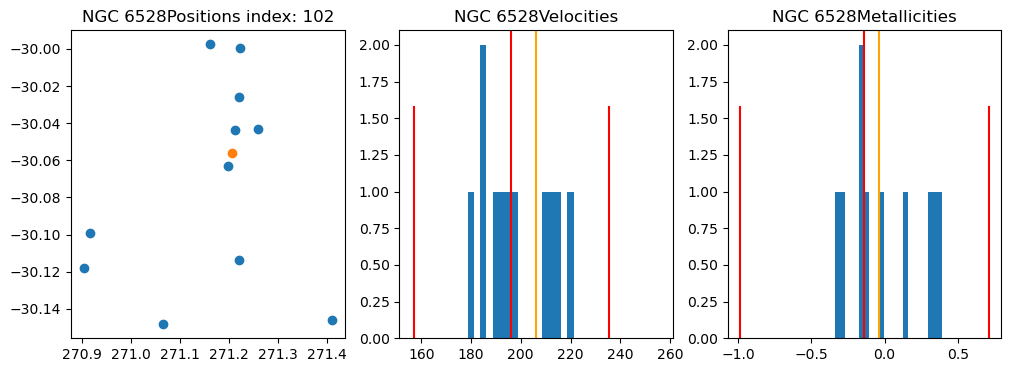

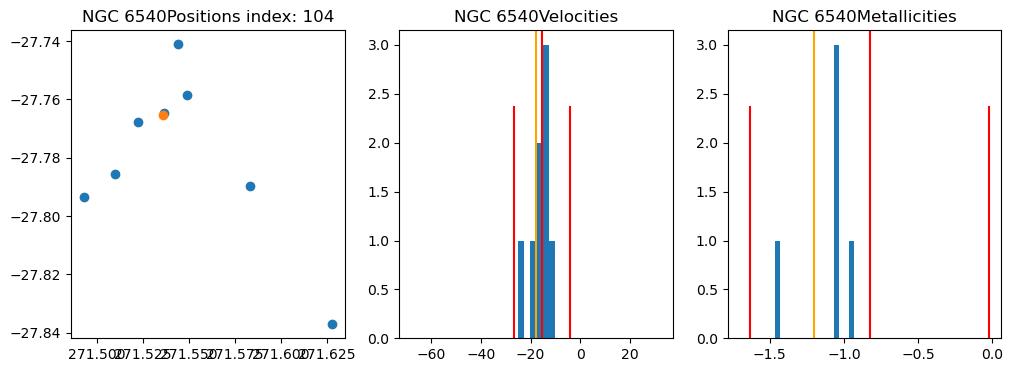

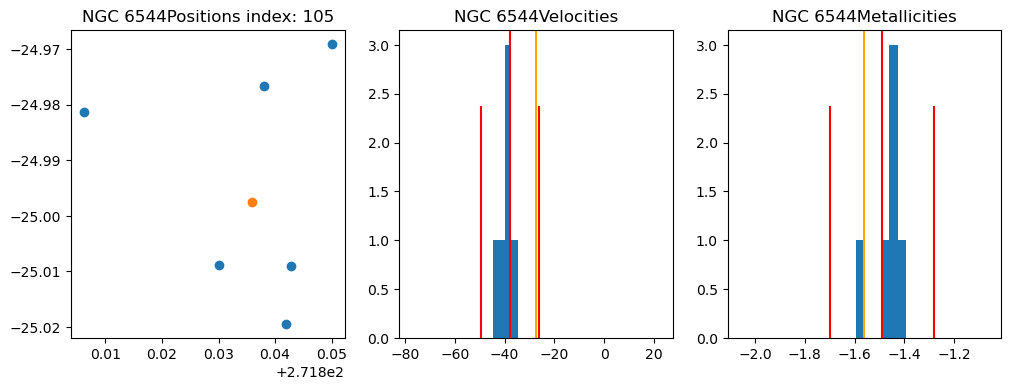

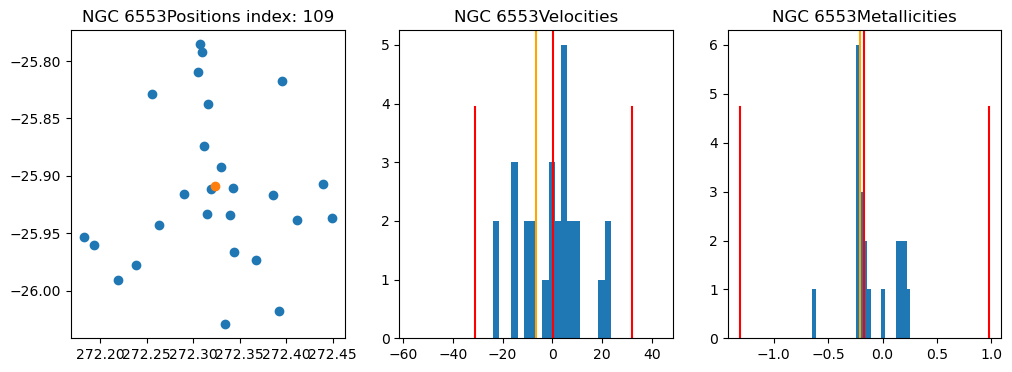

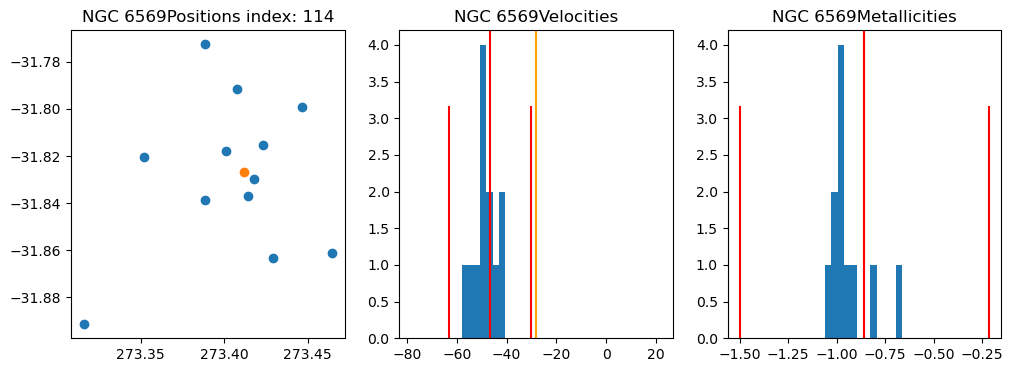

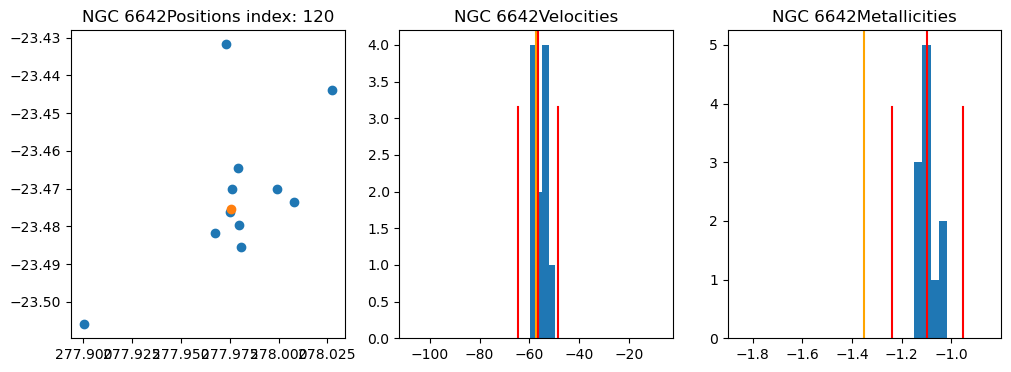

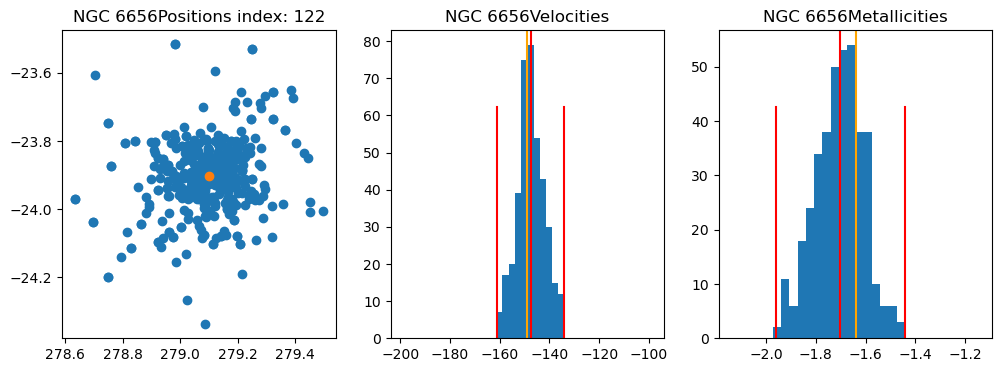

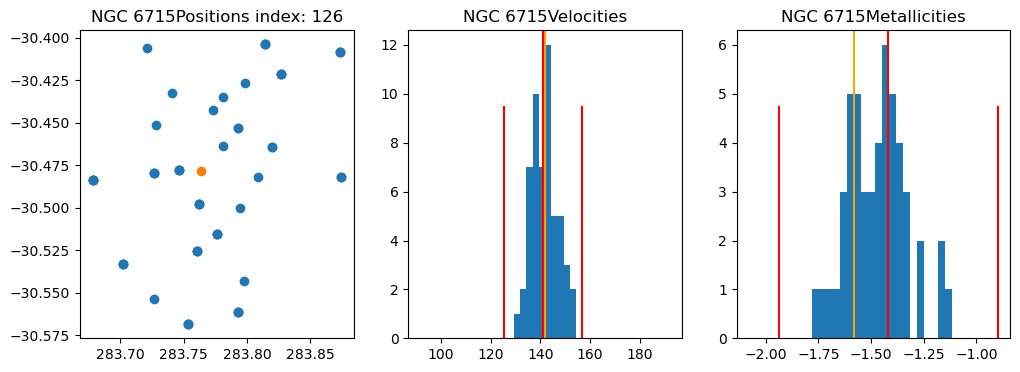

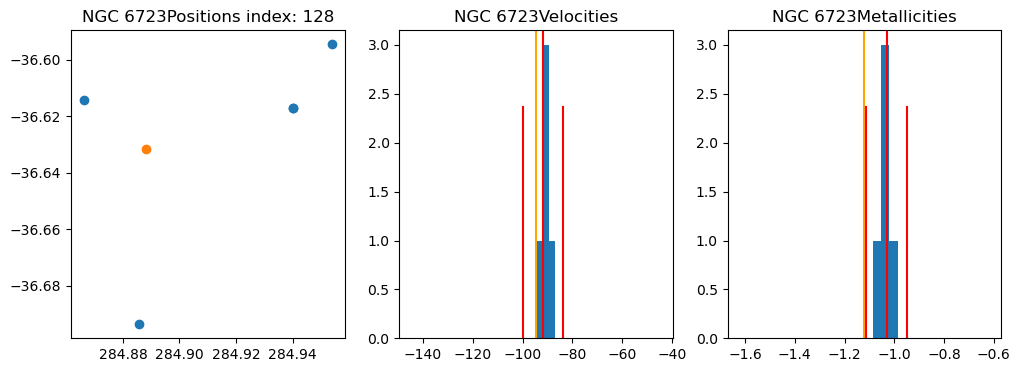

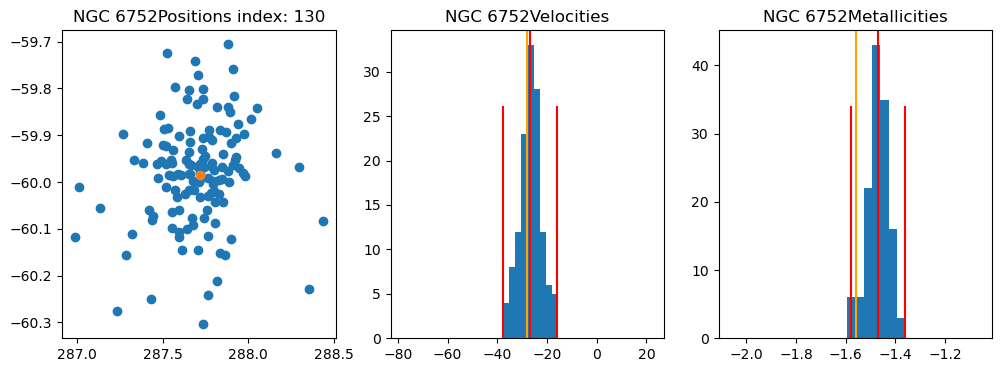

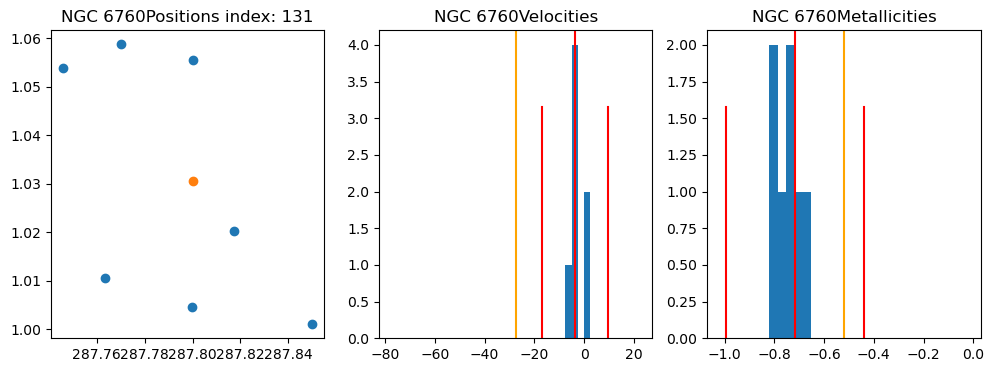

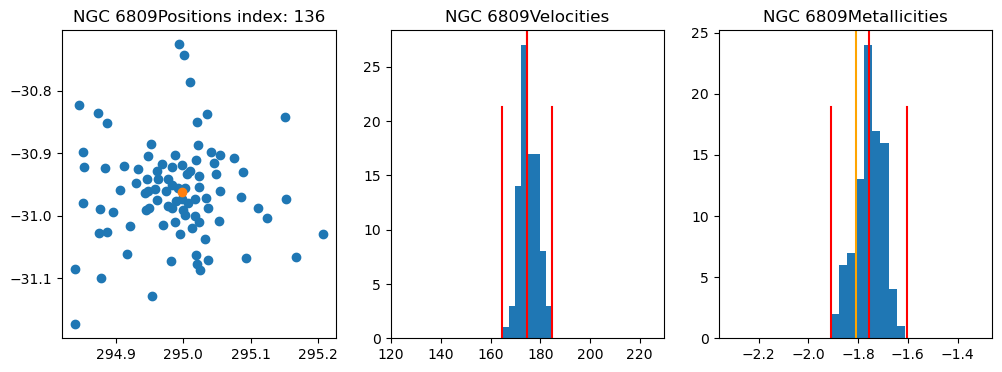

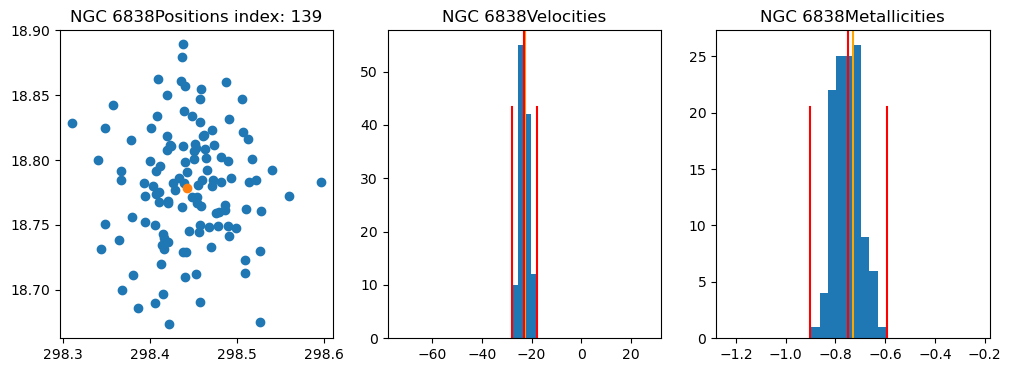

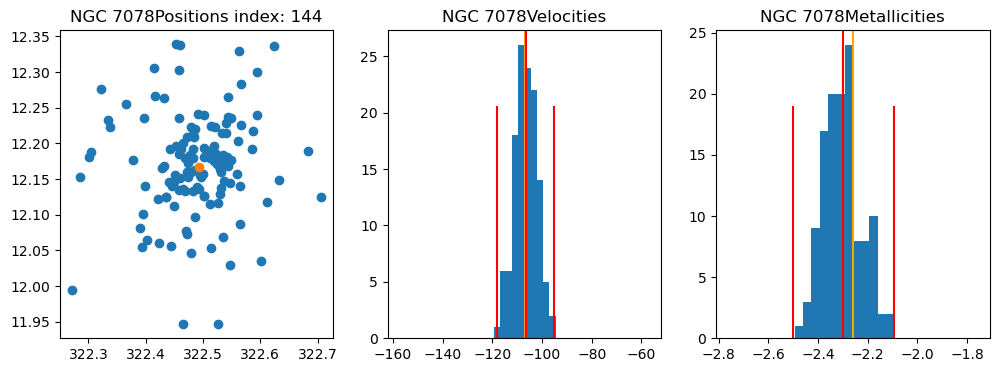

In [13]:
for i in range(len(std2clusters)):
    graphmin = glob_clust[i]["RV"] -50
    graphmax = graphmin + 100
    
    metalmin = glob_clust[i]["FEH"] - .5
    metalmax = metalmin + 1
    
    if(numberOfMatches[i]<10):
        continue
    
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.scatter(std2clusters[i]["RA"], std2clusters[i]["DEC"])
    plt.scatter(glob_clust[i]["RA"]*15, glob_clust[i]["DEC"])
    plt.title(glob_clust[i]["ID"] + "Positions" + " index: " + str(i))
    
    plt.subplot(132)
    plt.hist(std2clusters[i]["VHELIO_AVG"],range=[graphmin,graphmax],bins=40)
    plt.axvline(glob_clust[i]["RV"],0,1,color="orange")
    plt.axvline(medvel[i],0,1,color="red")
    plt.axvline(medvel[i] + stdvel[i]*2.5,0,.75,color="red")
    plt.axvline(medvel[i] - stdvel[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Velocities")
    
    plt.subplot(133)
    plt.hist(std2clusters[i]["FE_H"],range=[metalmin,metalmax],bins=30)
    plt.axvline(glob_clust[i]["FEH"],0,1,color="orange")
    plt.axvline(medmet[i],0,1,color="red")
    plt.axvline(medmet[i] + stdmet[i]*2.5,0,.75,color="red")
    plt.axvline(medmet[i] - stdmet[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Metallicities")
    plt.show()

In [15]:
glob_clust[16]

<Row index=16>
   ID         NAME             RA                DEC            L       B      RSUN    RGC      X       Y       Z      EBV     VHB     DMOD     VT     MVT      UB      BV      VR      VI     SRR     HBR     HBT     FEH        SPT         RV    RVERR    VLSR     VGSR      C         CREM        E       RC      RH      RT     LGTC    LGTH    MUV     RHO0 
 bytes8     bytes13         float64            float64       float64 float64 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32 float32    bytes13    float32 float32 float32  float32  float32    bytes13    float32 float32 float32 float32 float32 float32 float32 float32
-------- ------------- ------------------ ------------------ ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------- ------------- ------- ------- ------- --------- ------- ------------- ------- ------- ------- ------- ------- ------- ------- -------
NGC 3201       999999. 10.293555555343628 -46.41111111111111  277.23    8.64     5.0     8.9     0.6    -4.9     0.8    0.23   14.77   14.21    6.75   -7.46    0.38    0.96    0.62    1.23    80.1    0.08     4.0   -1.58 F6              494.0     0.2   481.9 269.45847     1.3       999999.    0.12    1.43    2.68   28.45    8.78     9.2   18.77    2.73

In [31]:
Gaia.ROW_LIMIT = 5000000  # Ensure the default row limit.
coord = SkyCoord(ra=10.294, dec=-46.411, unit=(u.hour, u.degree), frame='icrs')
j = Gaia.cone_search_async(coord, radius=u.Quantity(28.45, u.arcmin))
r = j.get_results()
r.pprint()
print(type(r))

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id             DESIGNATION          ...          dist        
                                                 ...                      
------------------- ---------------------------- ... ---------------------
1636148068921376768 Gaia DR3 5413575623988945920 ... 0.0003040090423682285
1636148068921376768 Gaia DR3 5413575623988944768 ...  0.000409431490746169
1636148068921376768 Gaia DR3 5413575623988926592 ... 0.0005316553581783314
1636148068921376768 Gaia DR3 5413575623988889216 ... 0.0006933410562947633
1636148068921376768 Gaia DR3 5413575623988946048 ...  0.000798880899757932
1636148068921376768 Gaia DR3 5413575623988945792 ... 0.0008142147164086718
1636148068921376768 Gaia DR3 5413575623988889344 ... 0.0008395009900691187
1636148068921376768 Gaia DR3 5413575623996270464 ... 0.0008629197989798499
1636148068921376768 Gaia DR3 5413575623988945536 ... 0.0008701209598157176
1636148068921376768 Gaia DR3 5413575623988926720 .

In [32]:
rnew = 
#


['solution_id',
 'DESIGNATION',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

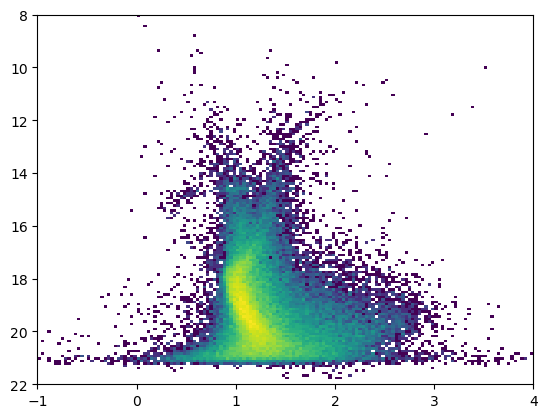

In [41]:
from matplotlib.colors import LogNorm
plt.figure()
plt.hist2d(r["bp_rp"],r["phot_g_mean_mag"],bins=150,range=[[-1,4],[8,22]], norm=LogNorm())
plt.ylim(22,8) #flips y axis

plt.show()

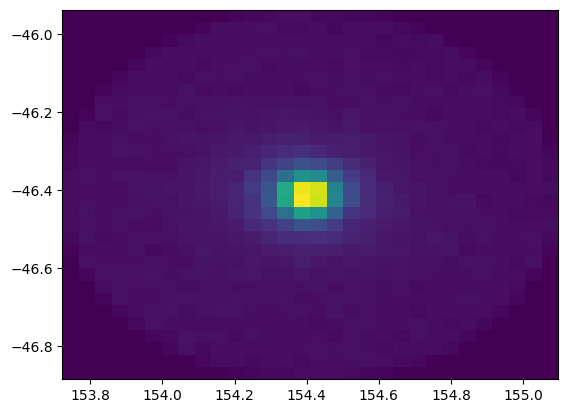

In [34]:
plt.figure()
plt.hist2d(r["ra"], r["dec"], bins=30)
plt.show()

In [30]:
glob_clust["RA"]

<Column name='RA' dtype='float64' length=150>
0.40144444439146254
 0.8798611111111111
 1.0539722222752042
  3.204250000052982
  3.556388888888889
  3.917416666679912
  4.412361111111111
  4.768305555582047
  5.235083333386315
  5.402944444550409
  6.816444444656372
  7.635694444444444
                ...
 19.753999999894035
 19.896138888465032
 20.101333333386318
 20.569888888994853
 20.891083333227368
  21.02486111111111
 21.499527777565852
  21.55813888867696
 21.672777777777778
 21.777444444232515
  23.11233333375719
 23.140750000211927

In [ ]:
#r.write("gaia16.fits")
#overplot apogee stars for each cluster on the HR diagram